# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

import re
from typing import Union

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import ElasticNet

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso

import scipy as sp

from sklearn.linear_model import Ridge

from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import cross_val_score

from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import pickle

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [2]:
print("Для повторяемости исследований")

Для повторяемости исследований


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [3]:
df_train = pd.read_csv(
    "https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv"
)
df_test = pd.read_csv(
    "https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv"
)

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


In [4]:
df_train_save = df_train.copy()
df_test_save = df_test.copy()

(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [5]:
# your code here
df_train.sample(n=10, random_state=42)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [6]:
# your code here
df_test

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>.
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [7]:
# your code here
# Определим категориальные переменные
categorical = [var for var in df_train.columns if df_train[var].dtype == "O"]

# Определим числовые переменные
numerical = [var for var in df_train.columns if df_train[var].dtype != "O"]

print("Всего {} категориальных переменных\n".format(len(categorical)))
print("Категориальные переменные:", categorical)
print(50 * "-")
print("Всего {} числовых переменных\n".format(len(numerical)))
print("Числовые переменные:", numerical)

Всего 9 категориальных переменных

Категориальные переменные: ['name', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque']
--------------------------------------------------
Всего 4 числовых переменных

Числовые переменные: ['year', 'selling_price', 'km_driven', 'seats']


In [8]:
# Основные статистики по Train для категориальных признаков
df_train.describe(include=["O"])

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,6999,6999,6999,6999,6999,6797,6797,6803,6796
unique,1924,4,3,2,5,386,120,316,419
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,116,3793,5826,6095,4587,197,885,330,468


In [9]:
# Основные статистики по Train для числовых признаков
df_train.describe()

,year,selling_price,km_driven,seats
count,6999.000000,6.999000e+03,6.999000e+03,6797.000000
mean,2013.818403,6.395152e+05,6.958462e+04,5.419008
std,4.053095,8.089419e+05,5.772400e+04,0.965767
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.700000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [10]:
# Основные статистики по Test для категориальных признаков
df_test.describe(include=["O"])

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,1000,1000,1000,1000,1000,981,981,981,981
unique,621,4,3,2,5,237,88,182,226
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm
freq,15,534,837,877,623,23,116,43,57


In [11]:
# Основные статистики по Test для числовых признаков
df_test.describe()

,year,selling_price,km_driven,seats
count,1000.000000,1.000000e+03,1000.000000,981.000000
mean,2013.681000,6.179010e+05,71393.341000,5.410805
std,4.012149,7.585539e+05,48486.218662,0.919985
min,1995.000000,3.100000e+04,1303.000000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,9.000000


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [12]:
# your code here
# Проверим пропущенные значения в категориальных признаках для Train
df_train[categorical].isnull().sum()

name              0
fuel              0
seller_type       0
transmission      0
owner             0
mileage         202
engine          202
max_power       196
torque          203
dtype: int64

In [13]:
# Проверим пропущенные значения в числовых признаках для Train
df_train[numerical].isnull().sum()

year               0
selling_price      0
km_driven          0
seats            202
dtype: int64

In [14]:
# Проверим пропущенные значения в категориальных признаках для Test
df_test[categorical].isnull().sum()

name             0
fuel             0
seller_type      0
transmission     0
owner            0
mileage         19
engine          19
max_power       19
torque          19
dtype: int64

In [15]:
# Проверим пропущенные значения в числовых признаках для Test
df_test[numerical].isnull().sum()

year              0
selling_price     0
km_driven         0
seats            19
dtype: int64

In [16]:
miss_cols = df_train.columns[df_train.isnull().any()].to_list()
print(f"Пропуски есть как в Train так и Test в столбцах: {miss_cols}")

Пропуски есть как в Train так и Test в столбцах: ['mileage', 'engine', 'max_power', 'torque', 'seats']


(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [17]:
# your code here
coll_names_dupl = df_train.drop(["selling_price"], axis=1).columns
dupl = df_train[df_train.duplicated(subset=coll_names_dupl, keep="first")].sort_values(
    by=["name"]
)  # keep='first' - помечаем все дубликаты как True кроме первого вхождения

In [18]:
print(
    f"Всего дубликатов с одинаковым признаковом описанием за исключением selling_price и *первого вхождения*: {dupl.shape[0]}"
)

Всего дубликатов с одинаковым признаковом описанием за исключением selling_price и *первого вхождения*: 1159


(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [19]:
# your code here
dupl

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6307,Audi Q3 2.0 TDI Quattro Premium Plus,2017,2825000,22000,Diesel,Dealer,Automatic,First Owner,15.73 kmpl,1968 CC,174.33 bhp,380Nm@ 1750-2500rpm,5.0
6704,Audi Q5 3.0 TDI Quattro,2014,1850000,76131,Diesel,Individual,Automatic,First Owner,13.22 kmpl,2967 CC,241.4 bhp,580Nm@ 1400-3250rpm,5.0
6640,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
1595,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
2787,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6778,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
3623,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
2293,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0
5652,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [20]:
# your code here
df_train = df_train[
    df_train.duplicated(subset=coll_names_dupl, keep="first") == False
].copy()

In [21]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [22]:
# your code here
df_train = df_train.reset_index(drop=True).copy()

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая:
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``.
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [23]:
# your code here
cols_to_change = ["mileage", "engine", "max_power"]

for df_iter in [df_train, df_test]:
    for col in cols_to_change:
        df_iter[col] = pd.to_numeric(df_iter[col].str.split(" ", expand=True)[0])

In [24]:
# import re
# from typing import Union


def split_torque_col(x, output: str = "torque") -> pd.Series:
    def split_torque(torque: Union[str, float]) -> Union[int, float]:
        if isinstance(torque, str):
            torque = torque.lower().replace(",", "").replace("/", "")
            torque = re.findall(r"[\d\.]+", torque)
            torque = [float(val) for val in torque]

            if "kgm" in torque:
                torque[0] = np.round(torque[0] * 9.80665)

            if len(torque) < 2:
                torque = [np.nan] + torque if "kgm" not in torque else torque + [np.nan]

            return torque[1] if output == "max_torque_rpm" else torque[0]
        else:
            return torque

    return x.apply(split_torque)

In [25]:
df_train["max_torque_rpm"] = split_torque_col(
    df_train["torque"], output="max_torque_rpm"
)
df_train["torque"] = split_torque_col(df_train["torque"], output="torque")

df_test["max_torque_rpm"] = split_torque_col(df_test["torque"], output="max_torque_rpm")
df_test["torque"] = split_torque_col(df_test["torque"], output="torque")

In [26]:
numerical.extend(cols_to_change + ["torque", "max_torque_rpm"])

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [27]:
# your code here
# Числовые признаки
# Заполним пропущенные значения в X_train and X_test медианой соотвествующего столбца X_train
for df_iter in [df_train, df_test]:
    for col in numerical:
        col_median = df_train[col].median()
        df_iter[col].fillna(col_median, inplace=True)


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [28]:
display(df_train[numerical].nunique())

print(50 * "-")
print(
    "Кол-во уникальных значений для признака seats - всего 9. \n\
Следовательно его можно рассматривать как категориальную переменную с последущей кодировкой OHE"
)
print(50 * "-")
print(
    "К тому же это позволит лучше учесть нелинейные взаимосвязи между количеством мест и ценой автомобиля при использовании линейных моделей."
)

year               29
selling_price     629
km_driven         827
seats               9
mileage           376
engine            120
max_power         313
torque            234
max_torque_rpm     53
dtype: int64

--------------------------------------------------
Кол-во уникальных значений для признака seats - всего 9. 
Следовательно его можно рассматривать как категориальную переменную с последущей кодировкой OHE
--------------------------------------------------
К тому же это позволит лучше учесть нелинейные взаимосвязи между количеством мест и ценой автомобиля при использовании линейных моделей.


In [29]:
# your code here
for df_iter in [df_train, df_test]:
    for col in ["engine", "seats"]:
        df_iter[col] = df_iter[col].astype("Int64")

## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

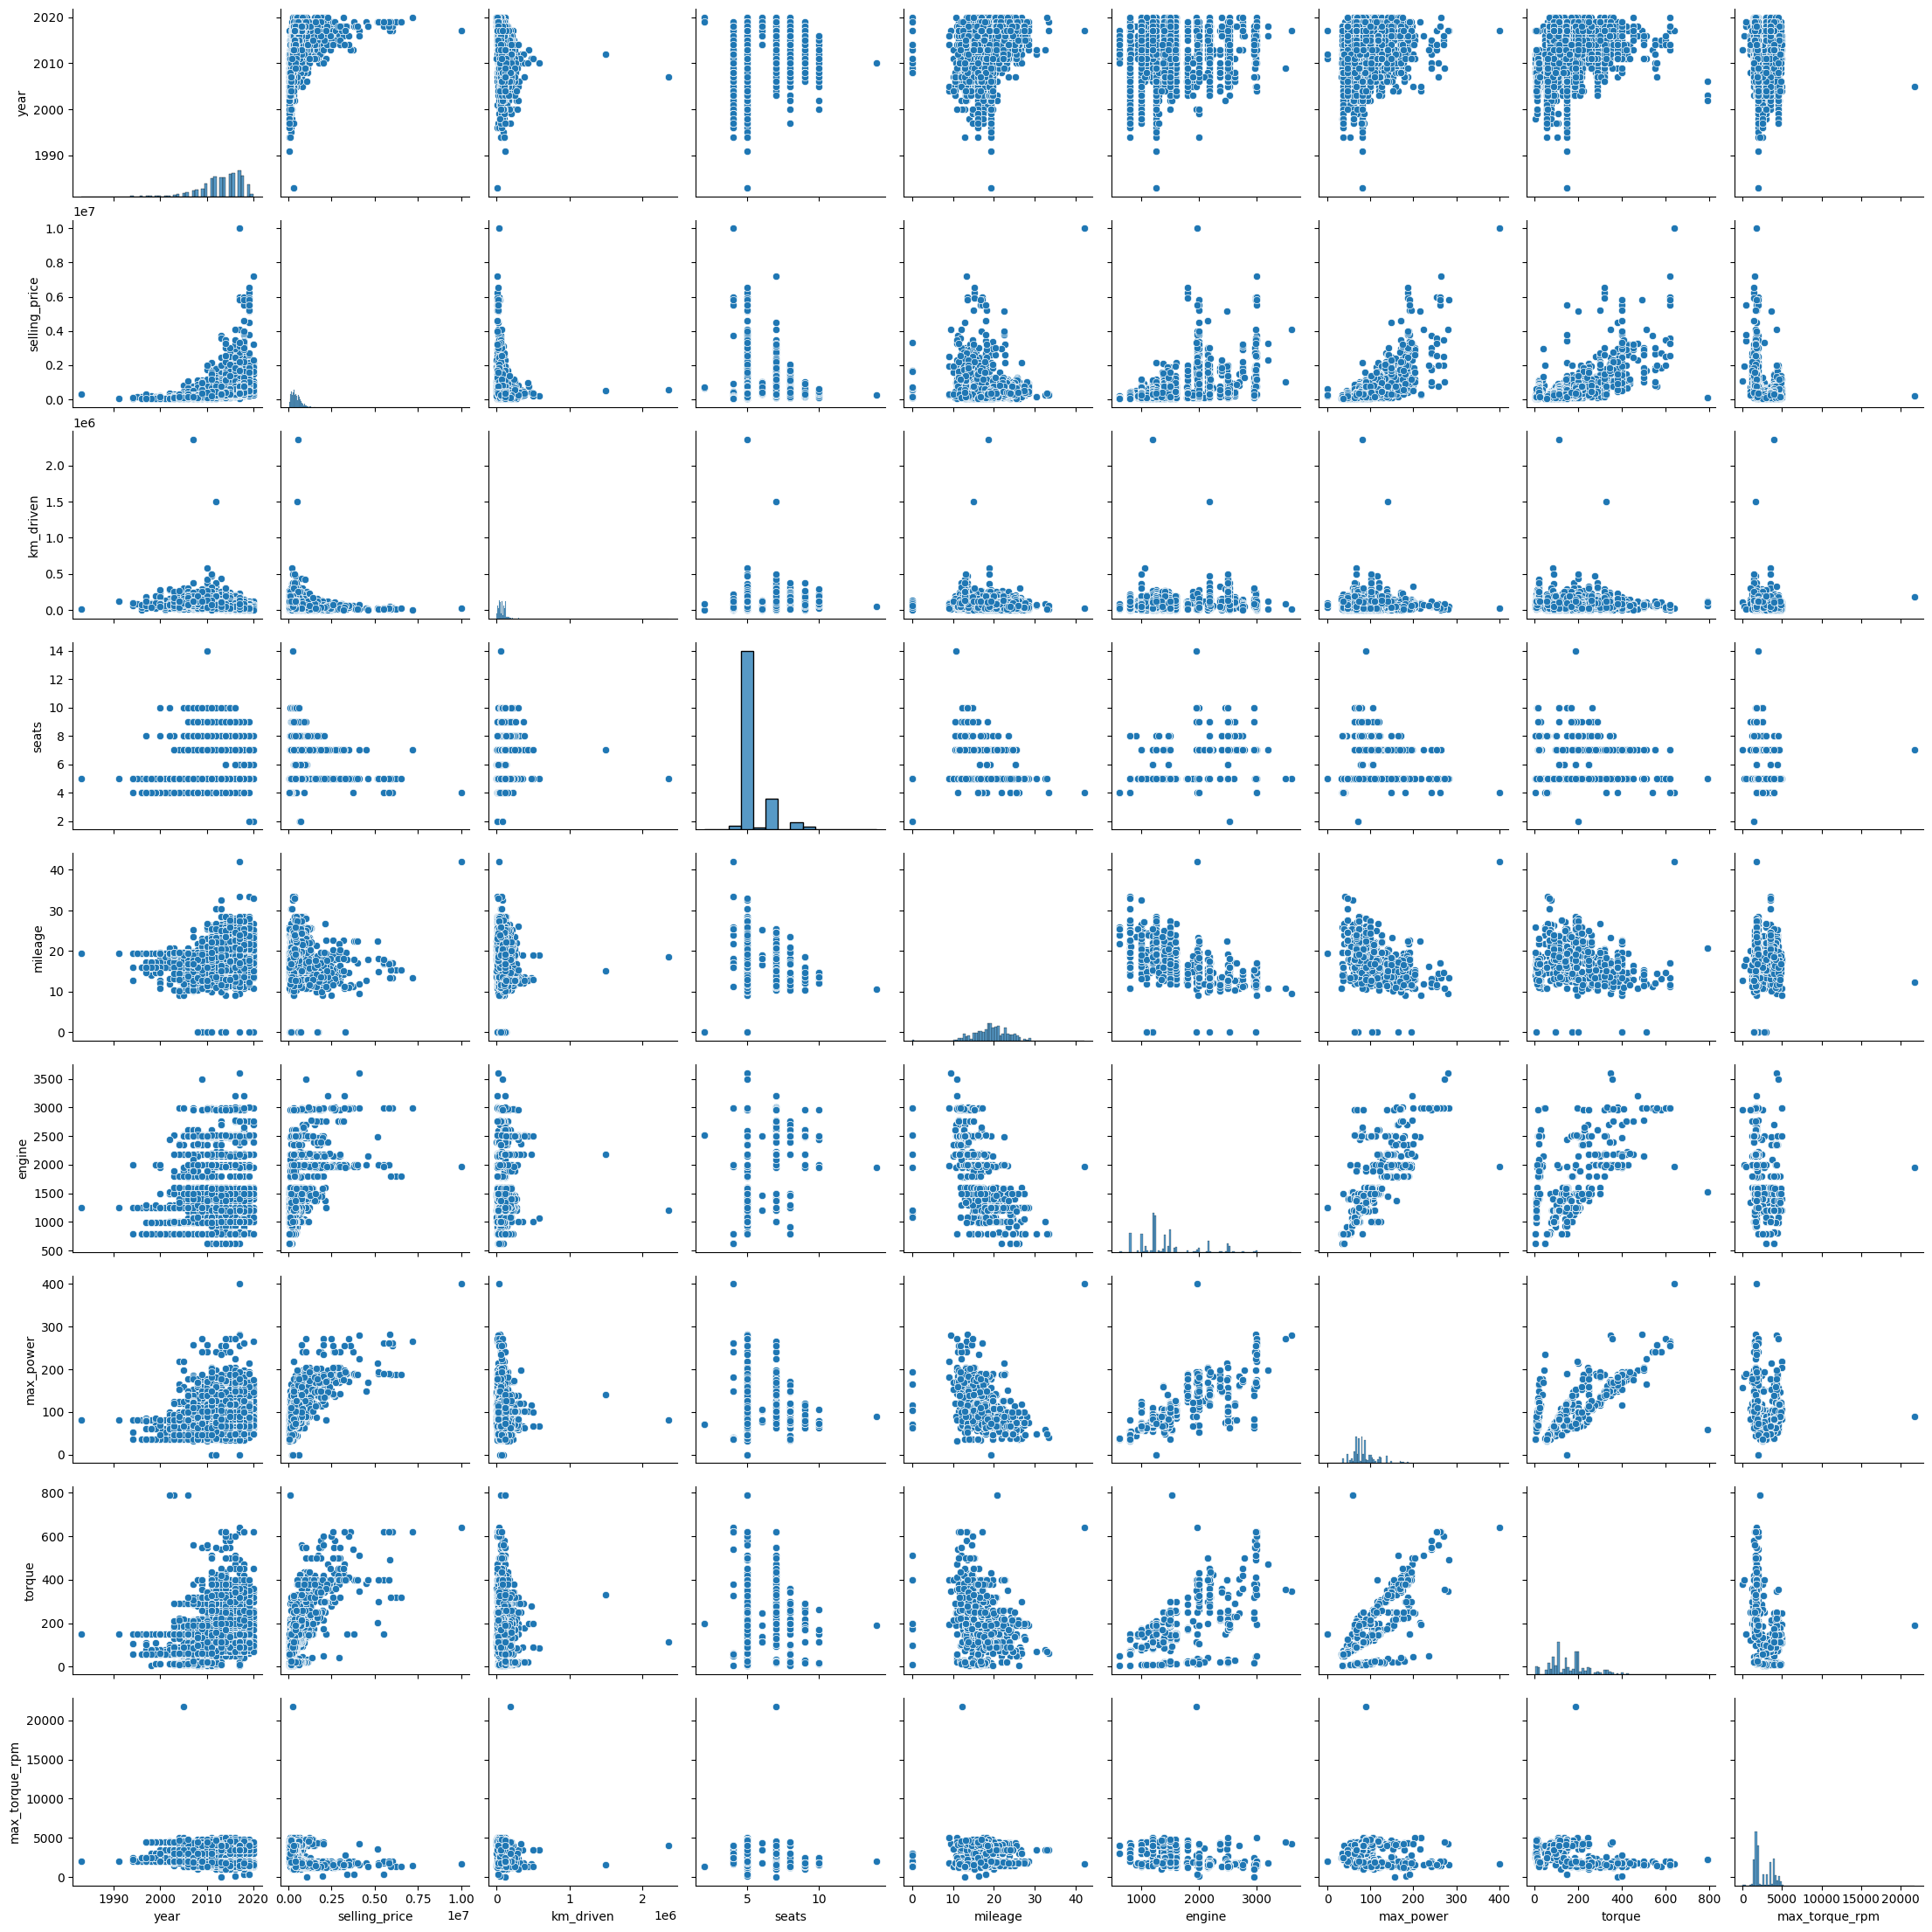

In [30]:
# your code here
sns.pairplot(df_train[numerical])
plt.show()

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

In [31]:
# your code here
df_train["seats"].value_counts(normalize=True)

5     0.790753
7     0.136986
8     0.032705
4     0.016096
9     0.011644
6     0.008219
10    0.003082
2     0.000342
14    0.000171
Name: seats, dtype: Float64

In [32]:
print(
    "1. Чем свежее год автомобиля тем больше его стоимость.\n\
2. Чем меньше пробег автомобиля тем так же стоимость его выше.\n\
3. Для 5-и местных автомобилей больше вего от сюда такая зависимость - что основной разборс цен приходится на них.\n\
4. Стоимость так же прямо пропорционально зависит он мощности и объема двигателя\n\
5. Мощность двигателя зависит от его объема\n\
"
)

1. Чем свежее год автомобиля тем больше его стоимость.
2. Чем меньше пробег автомобиля тем так же стоимость его выше.
3. Для 5-и местных автомобилей больше вего от сюда такая зависимость - что основной разборс цен приходится на них.
4. Стоимость так же прямо пропорционально зависит он мощности и объема двигателя
5. Мощность двигателя зависит от его объема



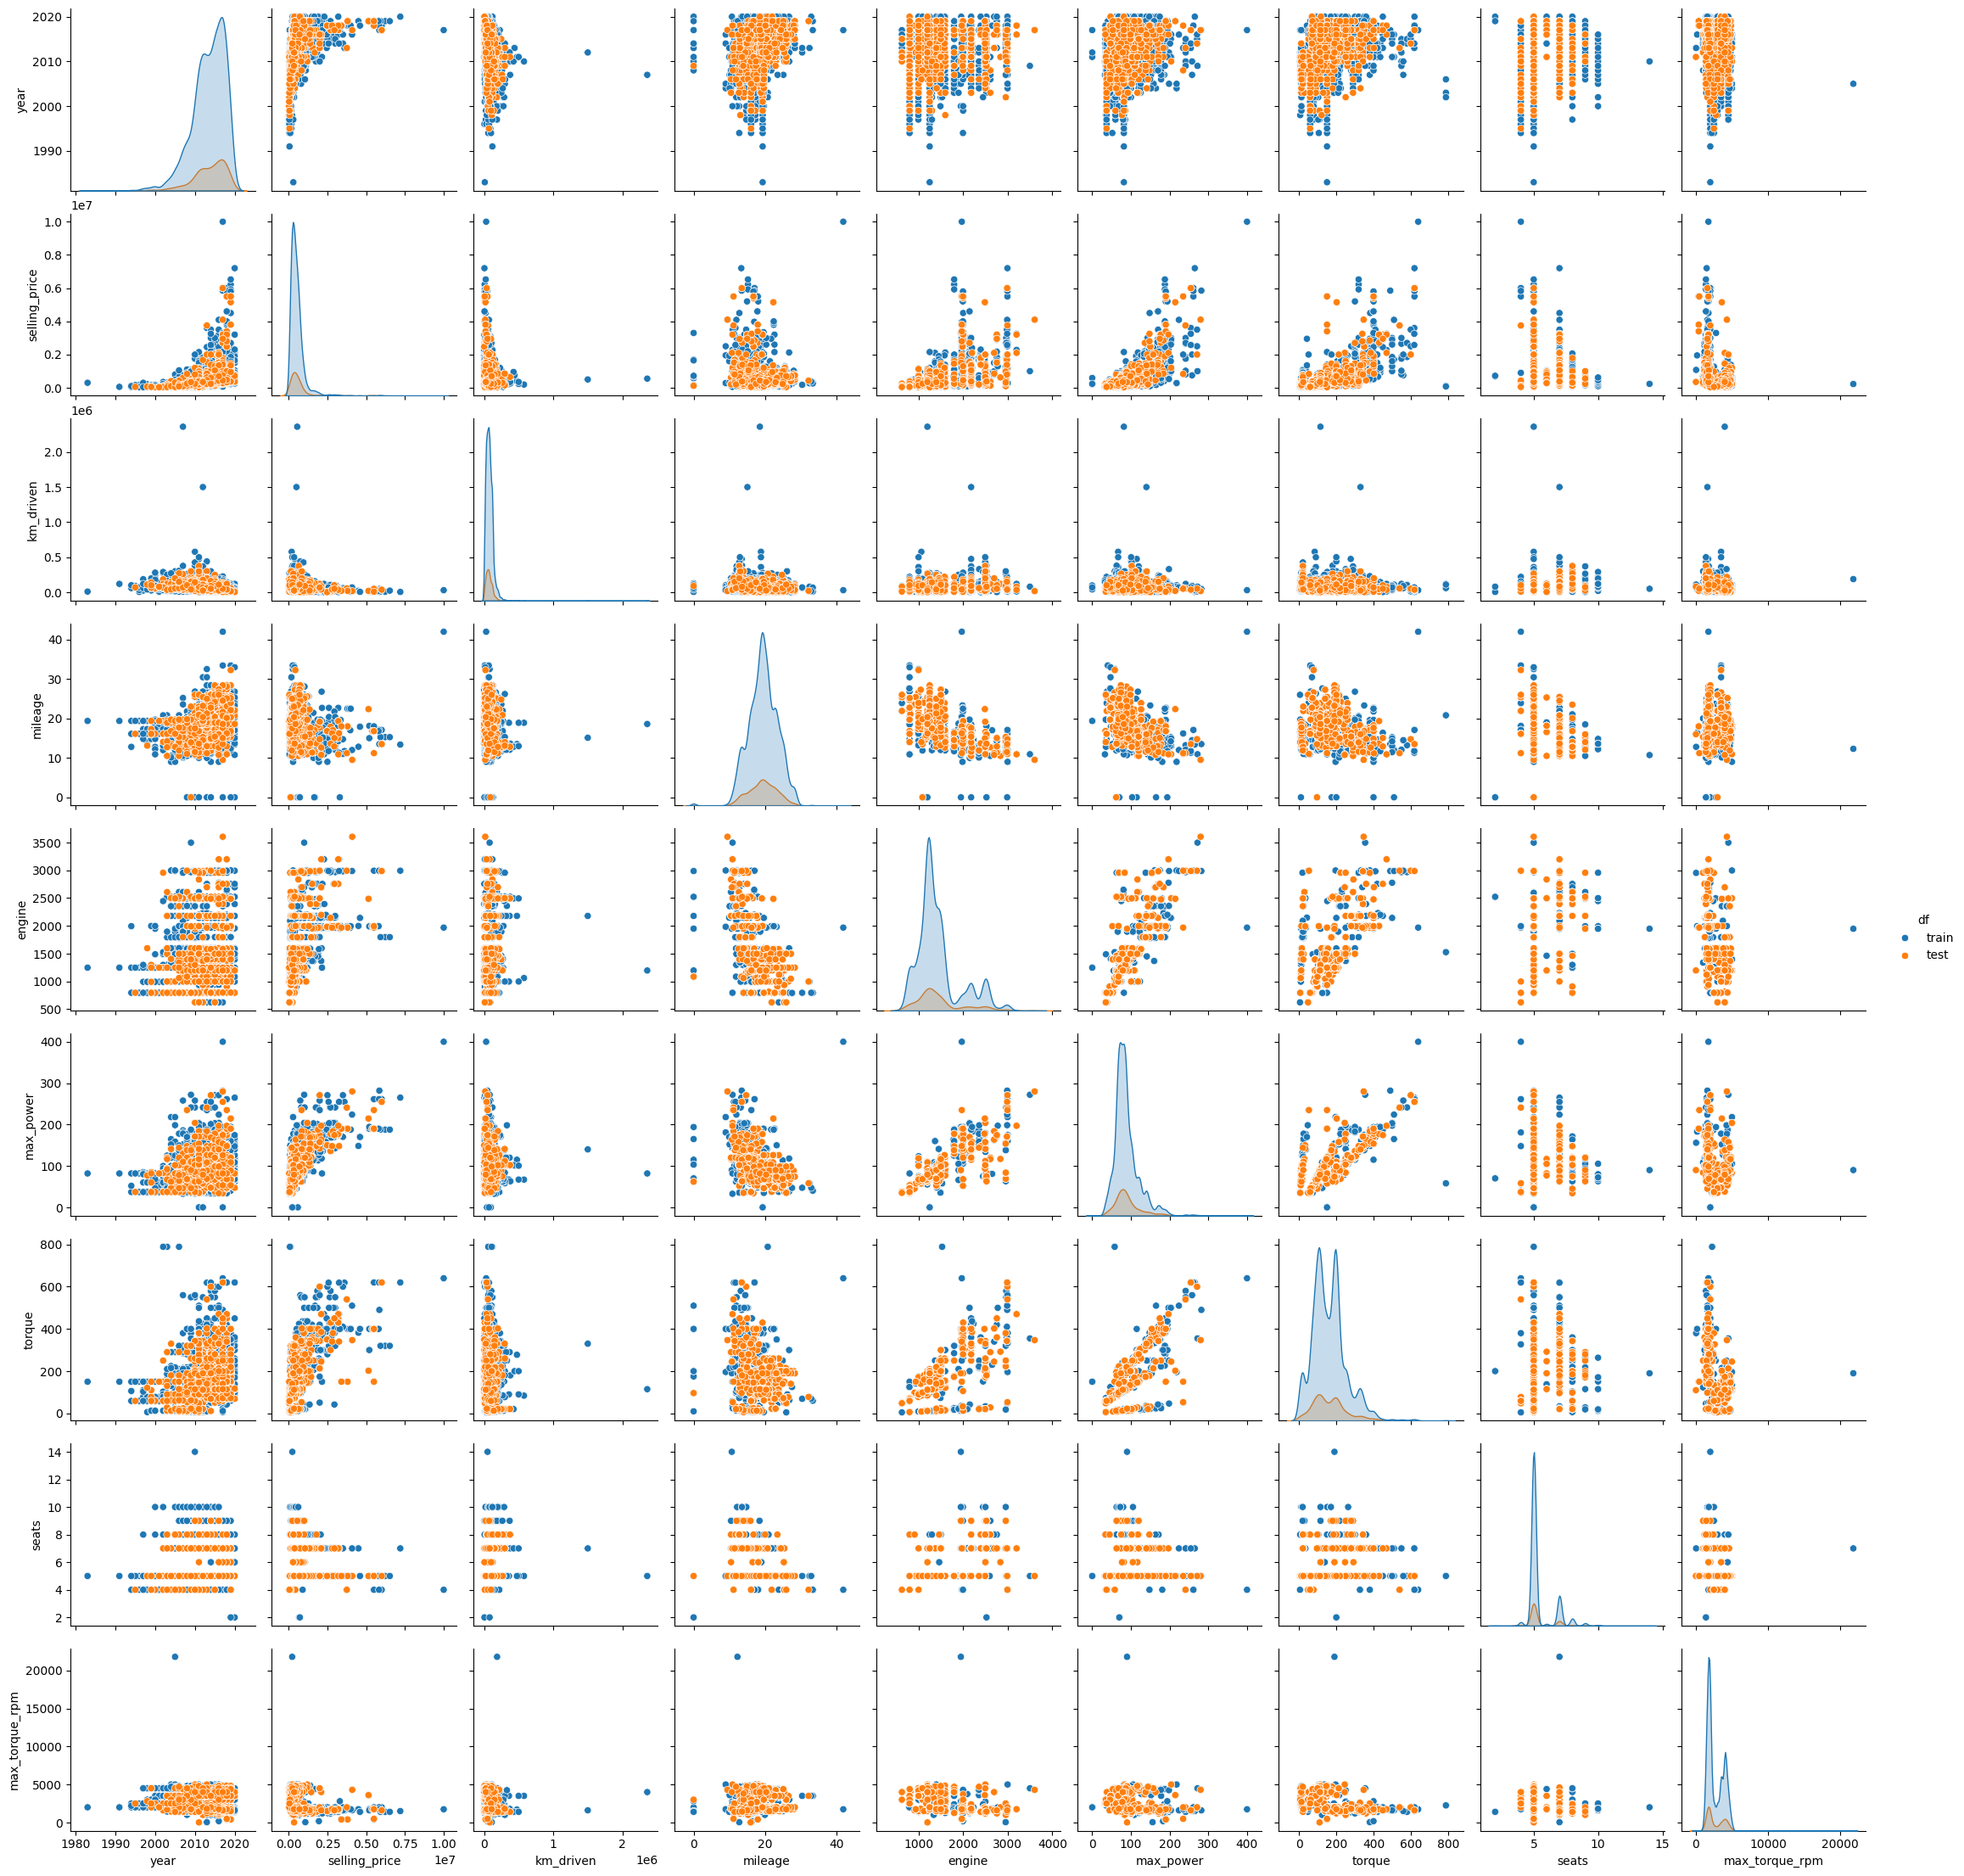

In [33]:
# your code here
# объединение трейна и теста с новым столбцом-индикатором датасета
data = pd.concat(
    [df_train.assign(df="train"), df_test.assign(df="test")], ignore_index=True
)

# построение графика попарных распределений числовых признаков трейна и теста
sns.pairplot(data=data, hue="df")
plt.show()

In [34]:
print(
    "В целом да, совокупности похожи на train и test. Так же можно считать что результаты обученных моделей на трейне и тесте не будут существенно отличаться."
)

В целом да, совокупности похожи на train и test. Так же можно считать что результаты обученных моделей на трейне и тесте не будут существенно отличаться.


(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

<Axes: >

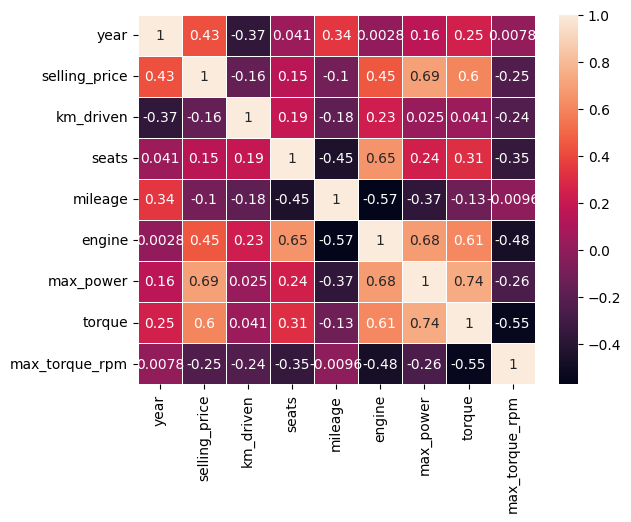

In [35]:
sns.heatmap(df_train[numerical].corr(), annot=True, linewidth=0.5)

Ответьте, пожалуйста, на вопросы:
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

In [36]:
print(
    "1. Год и Объем двигателя имеют наименьшую корреляцию.\n\
2. Между мощностью двигателя автомобиля и его стоимостью наблюдается довольно сильная положительная линейная зависимость.\n\
3. Чем меньше год автомобиля (=> возраст его больше) тем больше километров он проехал к дате продажи.\n\
Т.к корреляция отрицательныя и относительно высокая.\n\
Однако, для окончательного ответа необходимо рассмотреть группы автомобилей разных годов выпуска. Возможно на свежих авто накатывают больше км чем на более старых."
)

1. Год и Объем двигателя имеют наименьшую корреляцию.
2. Между мощностью двигателя автомобиля и его стоимостью наблюдается довольно сильная положительная линейная зависимость.
3. Чем меньше год автомобиля (=> возраст его больше) тем больше километров он проехал к дате продажи.
Т.к корреляция отрицательныя и относительно высокая.
Однако, для окончательного ответа необходимо рассмотреть группы автомобилей разных годов выпуска. Возможно на свежих авто накатывают больше км чем на более старых.


(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

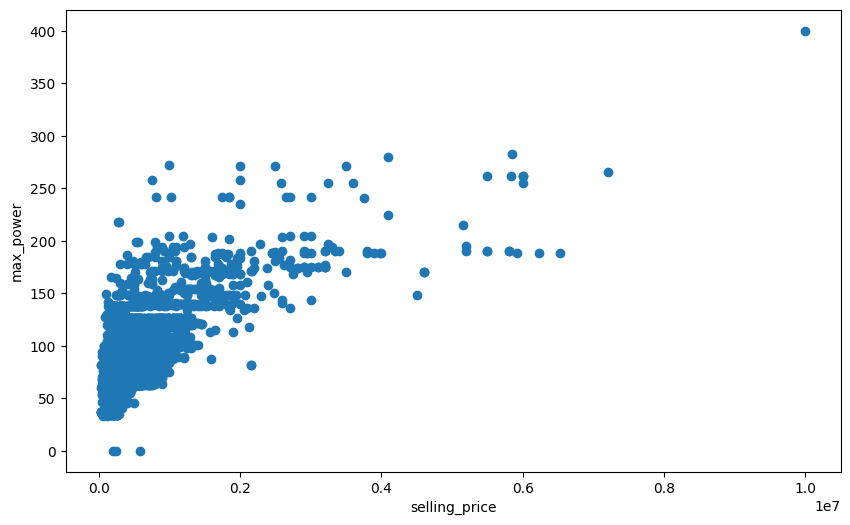

In [37]:
# your code here
# Высокая корреляция тут еще между engine и max_power, но рассмотрим целевую переменную selling_price и max_power
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x=df_train["selling_price"], y=df_train["max_power"])
plt.xlabel("selling_price")
plt.ylabel("max_power")

plt.show()

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

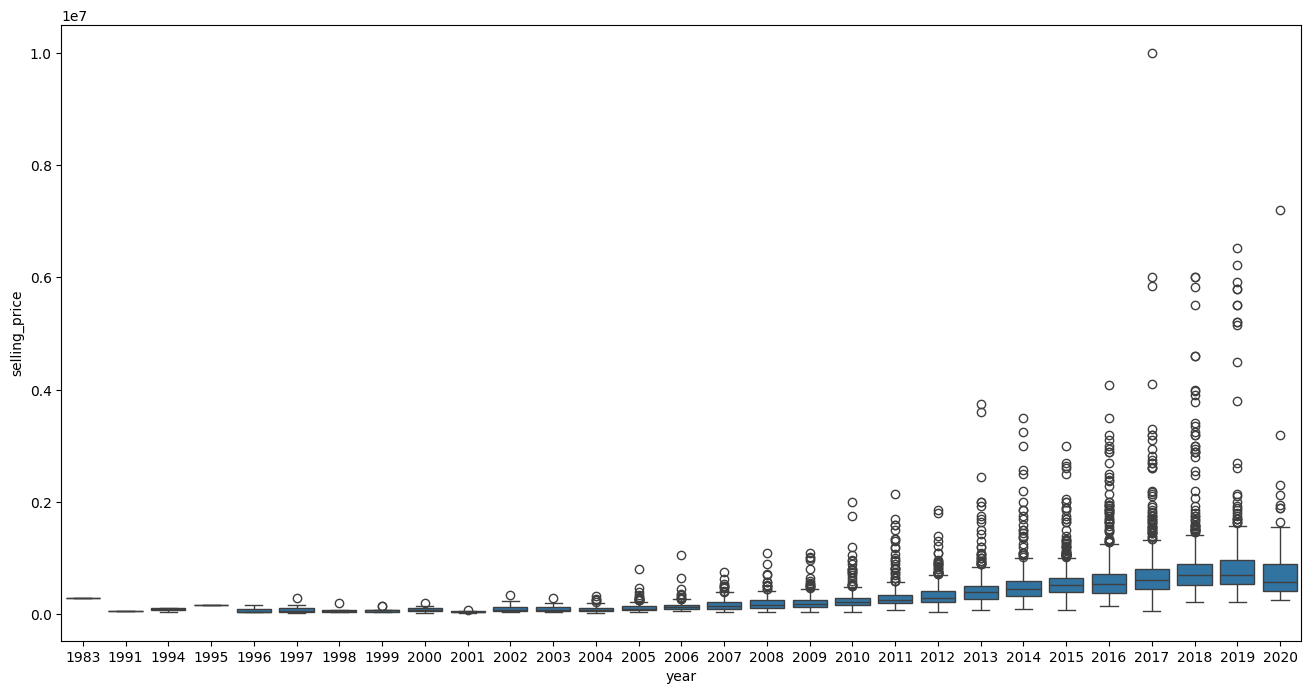

In [38]:
# your code here
data = df_train[["selling_price", "year"]]
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x="year", y="selling_price", data=data)

In [39]:
print(
    "Большое кол-во выбросов на автомоблили более свежих годов, значит нужно смотреть на марки машин"
)

Большое кол-во выбросов на автомоблили более свежих годов, значит нужно смотреть на марки машин


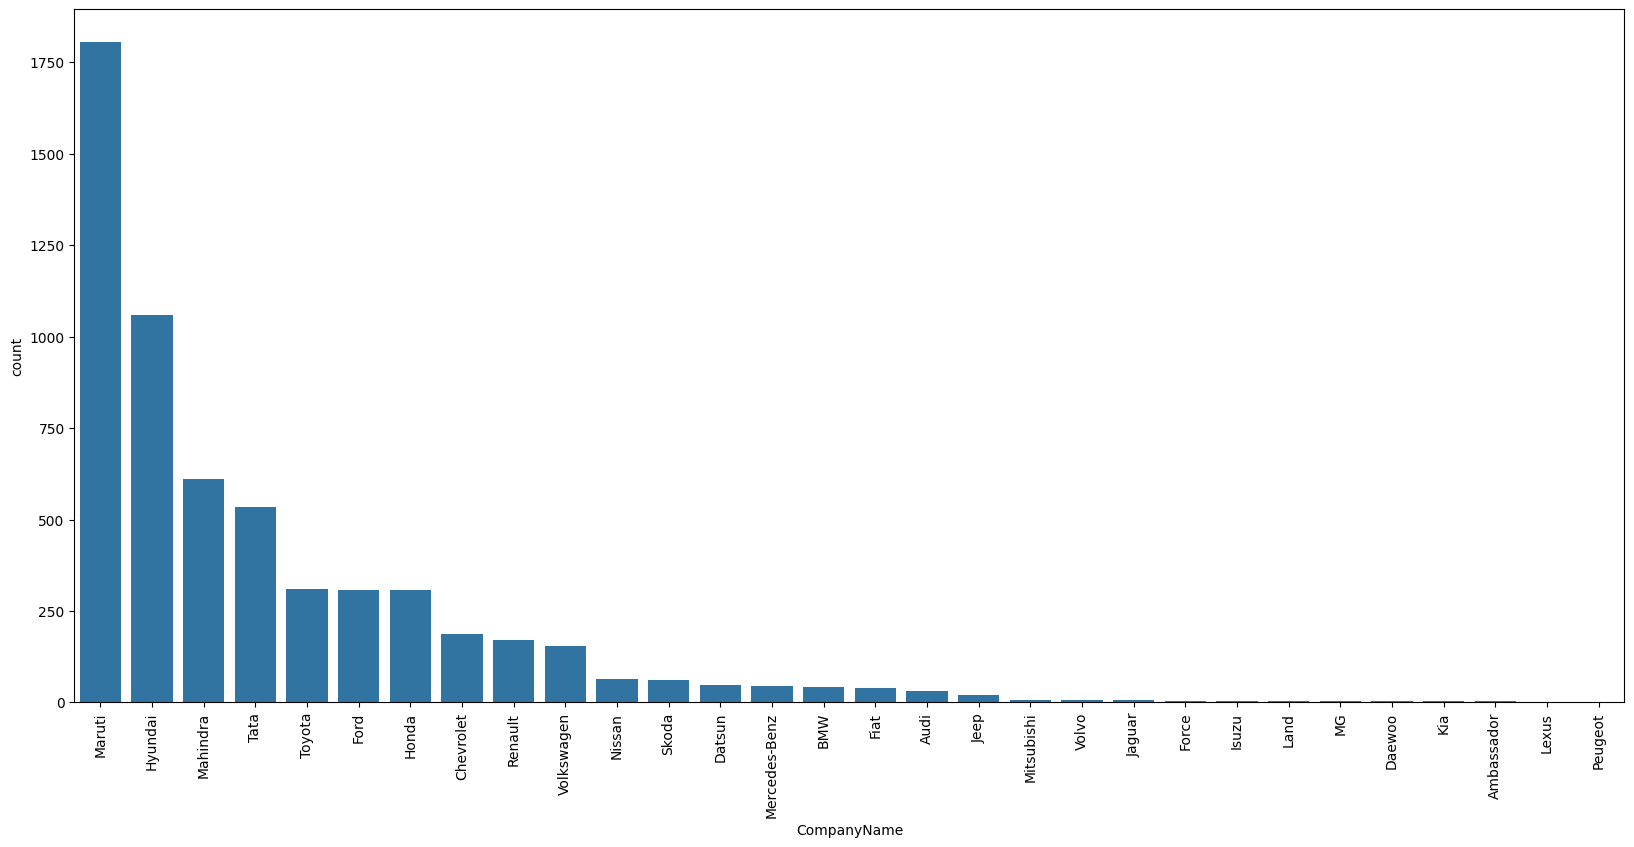

In [40]:
df_train["CompanyName"] = df_train["name"].apply(lambda x: x.split(" ")[0])
df_train["CompanyName"].unique()

plt.figure(figsize=(20, 9))

plt.xticks(rotation=90)
order = df_train["CompanyName"].value_counts(ascending=False).index
sns.countplot(x="CompanyName", data=df_train, order=order)

plt.show()

In [41]:
print("Maruti самый популярная марка, за ней идет Hyundai и Mahindra")

Maruti самый популярная марка, за ней идет Hyundai и Mahindra


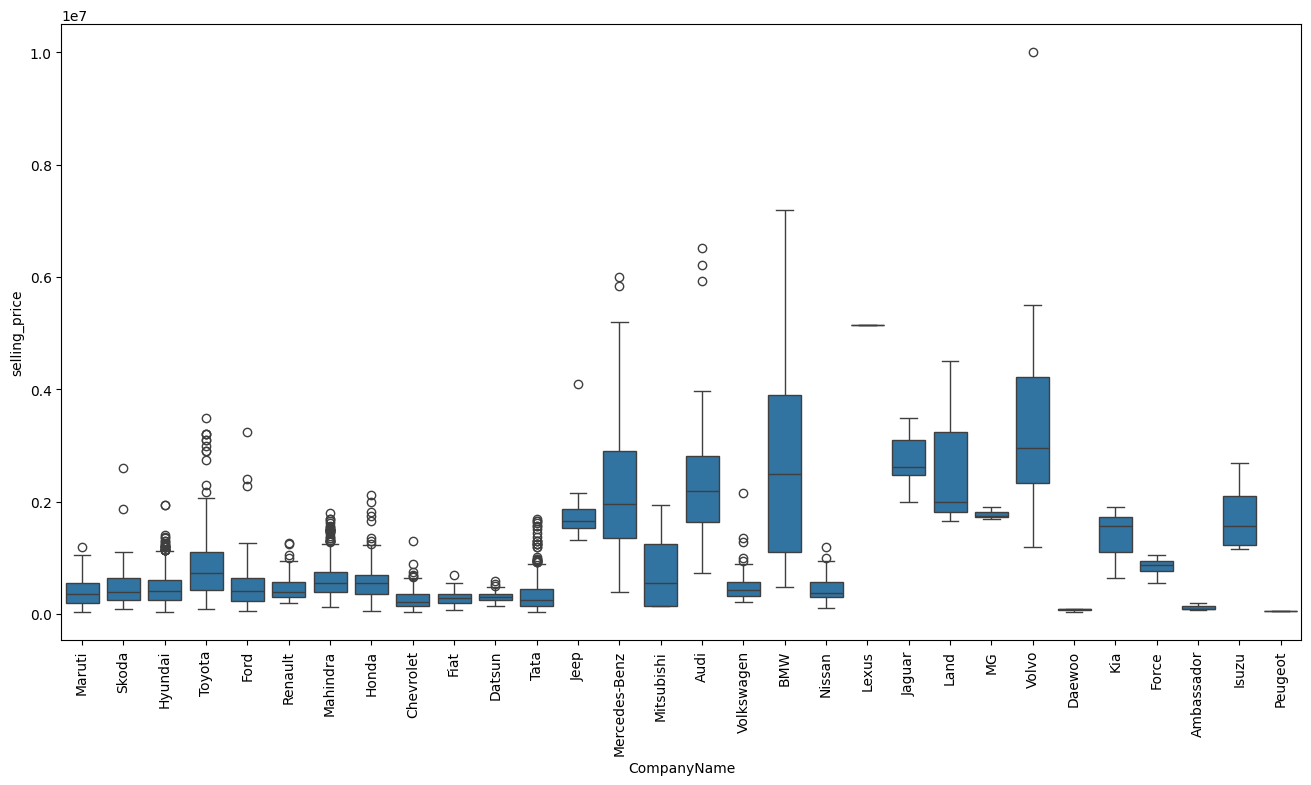

In [42]:
data = df_train[["selling_price", "CompanyName"]]
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x="CompanyName", y="selling_price", data=data)
ax.tick_params(axis="x", labelrotation=90)

In [43]:
print(
    "На графике видим что Volvo, BMW, Jaguar, Audi, Mercedes - одни из самых дорогий марок. При том у BMW - самый большой разброс цен"
)

На графике видим что Volvo, BMW, Jaguar, Audi, Mercedes - одни из самых дорогий марок. При том у BMW - самый большой разброс цен


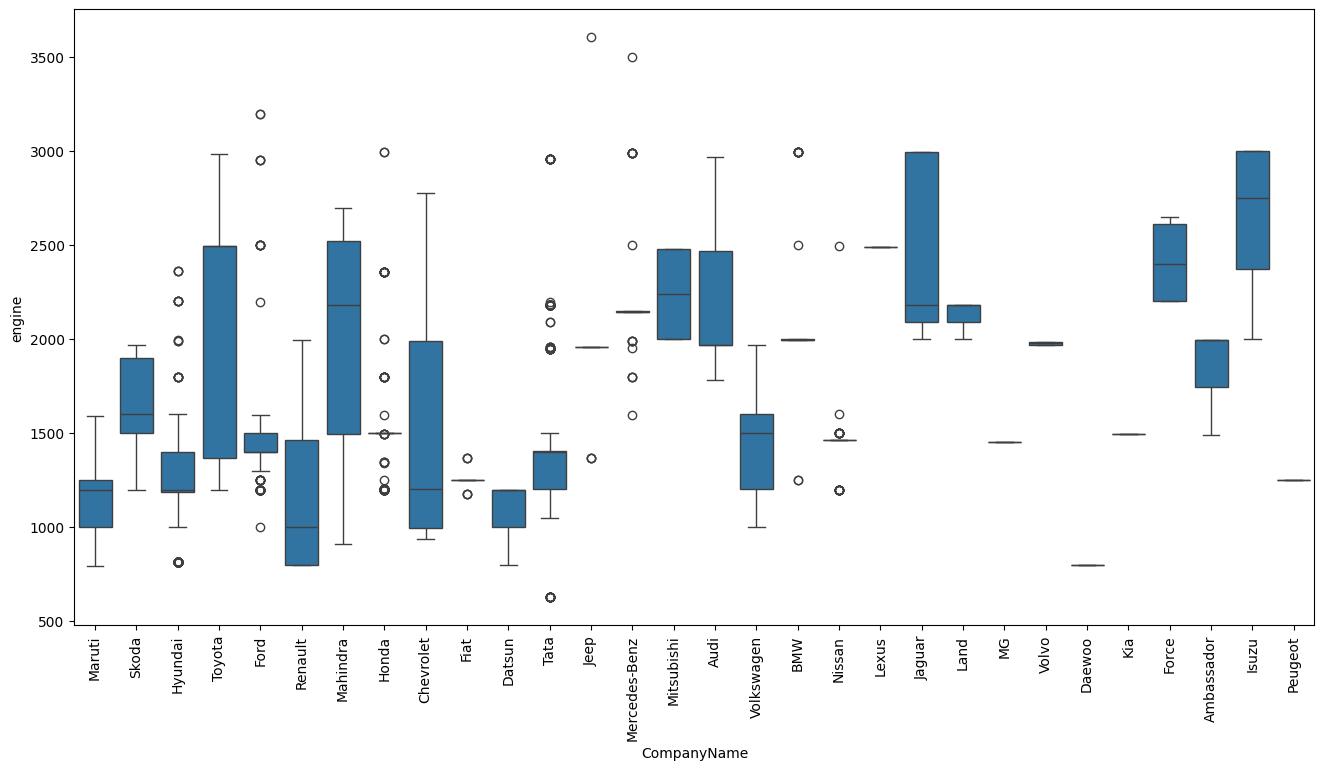

In [44]:
data = df_train[["engine", "CompanyName"]]
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x="CompanyName", y="engine", data=data)
ax.tick_params(axis="x", labelrotation=90)

In [45]:
print("На графике видим что Maruti - марка с одним из наименьших объемов двигателей")

На графике видим что Maruti - марка с одним из наименьших объемов двигателей


In [46]:
df_train = df_train.drop("CompanyName", axis=1)

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [47]:
df_train = (
    df_train.sample(frac=1, random_state=42).reset_index(drop=True).copy()
)  # Перемешаем строки, зафиксируем сид, сбросим индекса
df_test = (
    df_test.sample(frac=1, random_state=42).reset_index(drop=True).copy()
)  # Перемешаем строки, зафиксируем сид, сбросим индекса

In [48]:
y_train = df_train["selling_price"]
X_train = df_train[numerical].drop(["selling_price"], axis=1)

In [49]:
# изменил assert, так как мы разбили признак torque на два
assert X_train.shape == (5840, 8)

In [50]:
y_test = df_test["selling_price"]
X_test = df_test[numerical].drop(["selling_price"], axis=1)

In [51]:
assert X_test.shape == (1000, 8)

In [52]:
# -> df_train(6_999, 14) -> df_train(5_840, 14) -> X_train(5_840, 8) + y_train(5_840)
# -> df_test(1_000, 14) -------------------------> X_test(1_000, 8) + y_test(1_000)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [53]:
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import r2_score, mean_squared_error as MSE

In [54]:
def evaluate_model_regression(regressor, Xtrain, ytrain, Xtest, ytest):
    """
    Функция для отображения метрик
    """
    # Получим предсказания на Train
    y_pred_train = regressor.predict(Xtrain)
    # R2 score train
    r2_train = r2_score(ytrain, y_pred_train)
    # RMSE train
    rmse_train = MSE(ytrain, y_pred_train) ** 0.5

    # Получим предсказания на Test
    y_pred_test = regressor.predict(Xtest)
    # R2 score test
    r2_test = r2_score(ytest, y_pred_test)
    # MSE test
    rmse_test = MSE(ytest, y_pred_test) ** 0.5

    # Список с метриками
    metrics = [rmse_train, r2_train, rmse_test, r2_test]

    print("RMSE на Train {0:0.4f}: ".format(rmse_train))
    print("R квадрат на Train {0:0.4f}:".format(r2_train))
    print("-" * 40)
    print("RMSE на Test {0:0.4f}: ".format(rmse_test))
    print("R квадрат на Test {0:0.4f}:".format(r2_test))

    return y_pred_train, y_pred_test, metrics

In [55]:
# Словарь для сохранения метрик
metrics_dict = dict()
rename_metrics_dict = {
    "index": "model",
    0: "rmse_train",
    1: "r2_train",
    2: "rmse_test",
    3: "r2_test",
}

In [56]:
# Создадим модель
linreg = LinearRegression()

# Обучим модель
linreg.fit(X_train, y_train)

# Обучим модель и выведем метрики
y_pred_train, y_pred_test, metrics = evaluate_model_regression(
    linreg, X_train, y_train, X_test, y_test
)

RMSE на Train 337897.0440: 
R квадрат на Train 0.6017:
----------------------------------------
RMSE на Test 480644.0553: 
R квадрат на Test 0.5981:


In [57]:
# Сохраним метрики в словарь
metrics_dict["lr_default"] = metrics

Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [58]:
# from sklearn.preprocessing import StandardScaler

cols = X_train.columns

scaler = StandardScaler()

X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

# Заменим индексы
X_train_scaler = pd.DataFrame(X_train_scaler, columns=cols)
X_test_scaler = pd.DataFrame(X_test_scaler, columns=cols)

In [59]:
# -> df_train(6_999, 14) -> df_train(5_840, 14) -> X_train(5_840, 8) + y_train(5_840) -> X_train_scaler(5_840, 8) + y_train(5_840)
# -> df_test(1_000, 14) -------------------------> X_test(1_000, 8) + y_test(1_000) ---> X_test_scaler(1_000, 8) + y_test(1_000)

In [60]:
# Создадим модель
linreg_scaler = LinearRegression()

# Обучим модель
linreg_scaler.fit(X_train_scaler, y_train)

# Обучим модель и выведем метрики
y_pred_train, y_pred_test, metrics = evaluate_model_regression(
    linreg_scaler, X_train_scaler, y_train, X_test_scaler, y_test
)

RMSE на Train 337897.0440: 
R квадрат на Train 0.6017:
----------------------------------------
RMSE на Test 480644.0553: 
R квадрат на Test 0.5981:


In [61]:
# Сохраним метрики в словарь
metrics_dict["lr_scaler_default"] = metrics

In [62]:
# вывод на экран рассчитанных метрик
pd.DataFrame(metrics_dict).T.reset_index().rename(columns=rename_metrics_dict)

,model,rmse_train,r2_train,rmse_test,r2_test
0,lr_default,337897.043952,0.601678,480644.055278,0.598109
1,lr_scaler_default,337897.043952,0.601678,480644.055278,0.598109


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [63]:
# Функция для вывода распределения весов при каждом признаке
def get_barplot_weight(df, model):
    fig = plt.figure(figsize=(10, 3))

    # creating the bar plot
    plt.bar(df.columns, model.coef_, color="b", width=0.4)

    plt.xlabel("Признак")
    plt.ylabel("Значение веса")
    plt.title("Величина веса по признаку")
    plt.show()

    # Посмотрим на коэффициенты
    print("Вес w_0 для всей модели: {}".format(model.intercept_))

    for i, col in enumerate(df):
        print("Вес w_{} на признаке {}: {:.4f}".format(i + 1, col, model.coef_[i]))

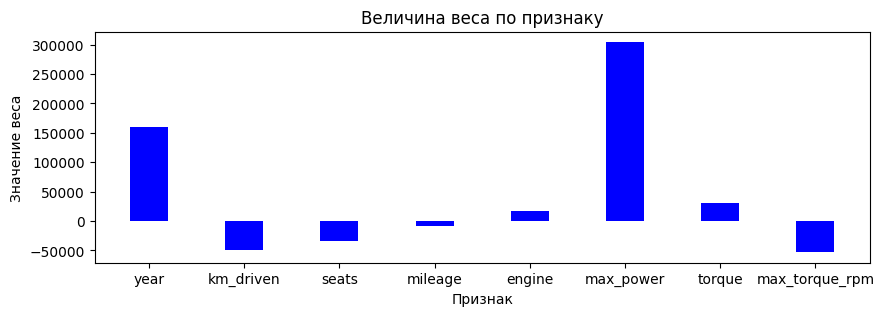

Вес w_0 для всей модели: 522960.0910958867
Вес w_1 на признаке year: 159649.6211
Вес w_2 на признаке km_driven: -49371.5647
Вес w_3 на признаке seats: -33874.4829
Вес w_4 на признаке mileage: -8099.8774
Вес w_5 на признаке engine: 16639.7518
Вес w_6 на признаке max_power: 304388.2857
Вес w_7 на признаке torque: 30845.4664
Вес w_8 на признаке max_torque_rpm: -52894.9227


In [64]:
# 1. Визуализируем значения весов по признакам
# https://www.kaggle.com/code/goyalshalini93/car-price-prediction-linear-regression-rfe
get_barplot_weight(X_train_scaler, linreg_scaler)

В данном случае большое положительное значение веса имеет **мощность** двигателя автомобиля и его **год**. </br>
Что вторит нашей идеи из исследования - чем **свежее год** авто и чем выше его **мощность** тем **дороже** он стоит </br>
- По значениям весов можно в какой-то мере говорить о важности того или иного признака. </br>
 </br>
- Коэффициенты показывают, насколько изменение каждого признака влияет на  </br>
целевую переменную при фиксированных значениях других признаков,
в одну или другую сторону.

Так же нужно обратить внимание на мультиколлинеарность, которая искажает оценки коэффициентов. </br>
- Если признаки сильно **коррелируют** друг с другом, оценки коэффициентов могут быть **нестабильными** или иметь большую стандартную ошибку.</br>
- Нужно анализировать **значимость весов**, применять **методы отбора** </br>
признаков, **визуализировать** данные и изучать контекста задачи. </br>

__Рекурсивный метод отбора RFE__

https://habr.com/ru/companies/otus/articles/528676/

In [65]:
# from sklearn.feature_selection import RFE

rfe = RFE(estimator=linreg_scaler, n_features_to_select=2)
rfe = rfe.fit(X_train_scaler, y_train)

In [66]:
list(zip(X_train_scaler.columns, rfe.support_, rfe.ranking_))

[('year', True, 1),
 ('km_driven', False, 3),
 ('seats', False, 5),
 ('mileage', False, 7),
 ('engine', False, 6),
 ('max_power', True, 1),
 ('torque', False, 4),
 ('max_torque_rpm', False, 2)]

In [67]:
# два наиболее значимых признака
X_train.columns[rfe.support_]

Index(['year', 'max_power'], dtype='object')

__Обнаружение корреляции VIF(variance inflation factor)__

__Используем statsmodel для более детальной оценки__ </br>
- Применим VIF - статистику для оценки мультиколлинеарности.
Путем измерения величины разборса оценок коэффициентов регрессии из-за мультиколлинеарности.</br>
https://www.kaggle.com/code/carlmcbrideellis/variance-inflation-factor-vif-and-explainability
- Так же обратим внимание на зависимость Хi от y, используя P-value > t, где: </br>
H0: wi = 0 (т.е. признак перед которым стоит коэф-т wi не влияет на у)</br>
Следовательно производя оценку при t>0.05 мы можем утверждать, </br>
что нет статистически значимой связи между признаком и зависимой переменной.</br>
https://habr.com/ru/articles/690414/
- Так же обращать стоит внимание на столбцы с нулевой дисперсией (одинаковые значения в столбце)</br>
И удалять их. **Смотри scikit-learn VarianceThreshold**.


In [68]:
# import statsmodels.api as sm
# from statsmodels.stats.outliers_influence import variance_inflation_factor


def build_model(X, y):
    X = sm.add_constant(X)
    lm = sm.OLS(y, X).fit()
    print(lm.summary())
    return X


def checkVIF(X):
    vif = pd.DataFrame()
    vif["Features"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["VIF"] = round(vif["VIF"], 2)
    vif = vif.sort_values(by="VIF", ascending=False)
    return vif

In [69]:
X_train_new = build_model(X_train_scaler, y_train)

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     1101.
Date:                Wed, 28 Feb 2024   Prob (F-statistic):               0.00
Time:                        16:35:18   Log-Likelihood:                -82633.
No. Observations:                5840   AIC:                         1.653e+05
Df Residuals:                    5831   BIC:                         1.653e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            5.23e+05   4424.996    118.

P-value в норме у тех признаков, где это значение меньше 0.05. Следовательно,  в таком случае, признак по мнению модели статистически значимо влияет на целевую переменную.

Иначе дела обстоят с mileage и engine, где P-value > 0.05. Следовательно они не являются статистически значимыми приедикатами для стоимости автомобиля в данной моедели.

In [70]:
# Посчитаем VIF
checkVIF(X_train_new)

,Features,VIF
5,engine,4.75
6,max_power,3.71
7,torque,3.48
4,mileage,2.42
3,seats,2.18
8,max_torque_rpm,2.05
1,year,1.62
2,km_driven,1.29
0,const,1.00


engine - Значение VIF менее 5 обычно считается приемлемым и указывает на отсутствие серьезной мультиколлинеарности.</br>

Некоторая корреляция между этим признаком и другими все же присутствует, но это значение все равно остается в пределах приемлемого диапазона.

Далее можно рассмотреть возможность удаления признаков с высокими значениями VIF и признаков с P-value выше нормы. Однако, в данном случае, остановимся на этом моменте.

In [71]:
# Функция для визуальной оценки результата работы модели
# Со ссылок ниже все нагло скопировал к себе.
# https://www.kaggle.com/code/sudhirnl7/linear-regression-tutorial
# https://www.kaggle.com/code/mohaiminul101/car-price-prediction
# https://www.kaggle.com/code/goyalshalini93/car-price-prediction-linear-regression-rfe

# import scipy as sp


def get_model_validation(y_pred_train, y_pred_test):
    fig, ax = plt.subplots(2, 4, figsize=(20, 12))
    """
  1. Линейная связь.
  В линейной модели связь между зависимой и независимой переменной должна быть линейной.
  Это можно проверить с помощью точечной диаграммы -
  фактическое значение по сравнению с прогнозируемым значением.
  """
    # Линейность на Train
    ax[0, 0].set_title("Лин-я зависимость Train")
    sns.scatterplot(x=y_train, y=y_pred_train, color="r", ax=ax[0, 0])
    ax[0, 0].set_xlabel("Верные значения")
    ax[0, 0].set_ylabel("Предсказанные значения")
    # Линейность на Test
    ax[1, 0].set_title("Лин-я зависимость Test")
    sns.scatterplot(x=y_test, y=y_pred_test, color="r", ax=ax[1, 0])
    ax[1, 0].set_xlabel("Верные значения")
    ax[1, 0].set_ylabel("Предсказанные значения")
    """
  2. Распределение остатков.
  График остатков должен иметь нормальное распределение.
  Это педположение для того, чтобы оценки параметров модели были несмещенными и эффективными.
  3. Среднее значение остатков должно быть ближе к нулю.
  """
    # Распределение остатков Train
    ax[0, 1].set_title("Распределение остатков Train")
    sns.histplot((y_train - y_pred_train), ax=ax[0, 1], color="b")
    ax[0, 1].axvline((y_train - y_pred_train).mean(), color="k", linestyle="--")
    ax[0, 1].set_xlabel("Остатки")
    ax[0, 1].set_ylabel("Кол-во значений")
    # Распределение остатков Test
    ax[1, 1].set_title("Распределение остатков Test")
    sns.histplot((y_test - y_pred_test), ax=ax[1, 1], color="b")
    ax[1, 1].axvline((y_test - y_pred_test).mean(), color="k", linestyle="--")
    ax[1, 1].set_xlabel("Остатки")
    ax[1, 1].set_ylabel("Кол-во значений")
    """
  4. Распределение остатков Q-Q plot.
  Остатки - (разница между фактическими значениями зависимой переменной и предсказанными значениями модели).
  График остатков должен иметь нормальное распределение.
  Среднее значение остатков должно быть ближе к нулю.
  График Quantile-Quantile (QQ plot) - однин из способов визуальной оценки нормальности остатков.
  Сравним квантили распределения остатков с квантилями теоретического нормального распределения.
  Если точки на графике близки к диагонали, это может указывать на нормальность остатков.
  """
    # Проверим многомерную нормальность Train
    sp.stats.probplot((y_train - y_pred_train), fit=True, plot=ax[0, 2])
    ax[0, 2].set_title("Q-Q график Test")
    ax[0, 2].set_xlabel("Теоретические квантили")
    ax[0, 2].set_ylabel("Наблюдаемые значения")
    # Проверим многомерную нормальность Test
    sp.stats.probplot((y_test - y_pred_test), fit=True, plot=ax[1, 2])
    ax[1, 2].set_title("Q-Q график Test")
    ax[1, 2].set_xlabel("Теоретические квантили")
    ax[1, 2].set_ylabel("Наблюдаемые значения")
    """
  5. Гомоскедастичность.
  Данные гомоскедастичны, что означает, что остатки имеют постоянную дисперсию по всей линии регрессии.
  Мы можем посмотреть на график разброса остаточных и подобранных значений.
  Если остатки примерно равномерно разбросаны вокруг нуля на графике без четкой закономерности, то мы обычно говорим,
  что предположение о ГОМОскедастичности выполнено.
  Если ГЕТЕРОскедастический график будет иметь форму воронки.
  """
    # Гомоскедастичность Train
    ax[0, 3].set_title("Гомоскедаскичность Train")
    sns.scatterplot(y=(y_train - y_pred_train), x=y_pred_train, ax=ax[0, 3], color="r")
    ax[0, 3].axhline(0, color="k", linestyle="--")
    ax[0, 3].set_xlabel("Предсказанные значения")
    ax[0, 3].set_ylabel("Остатки")
    # Гомоскедастичность Test
    ax[1, 3].set_title("Гомоскедаскичность Test")
    sns.scatterplot(y=(y_test - y_pred_test), x=y_pred_test, ax=ax[1, 3], color="r")
    ax[1, 3].axhline(0, color="k", linestyle="--")
    ax[1, 3].set_xlabel("Предсказанные значения")
    ax[1, 3].set_ylabel("Остатки")
    """
  6. Коэффициент инфляции дисперсии VIF.
  Линейная регрессия предполагает, что мультиколлинеарность в данных небольшая или отсутствует.
  Мультиколлинеарность возникает, когда независимые переменные слишком сильно коррелируют друг с другом.
  Коэффициент инфляции дисперсии VIF* определяет корреляцию между независимыми переменными и силу этой корреляции.
  VIF=1/(1−R2)
  Если VIF>1 и VIF<5 умеренная корреляция,
  VIF>5 — критический уровень мультиколлинеарности.
  https://ru.pharoskc.com/1330-what-is-the-variance-inflation-factor-vif
  """
    # Проверим уровень мультиколлинеарности для Train
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    VIF_train = 1 / (1 - r2_train)
    VIF_test = 1 / (1 - r2_test)

    print("VIF для Train {0:0.4f}:".format(VIF_train))
    print("-" * 25)
    print("VIF для Test {0:0.4f}: ".format(VIF_test))

VIF для Train 2.5105:
-------------------------
VIF для Test 2.4882: 


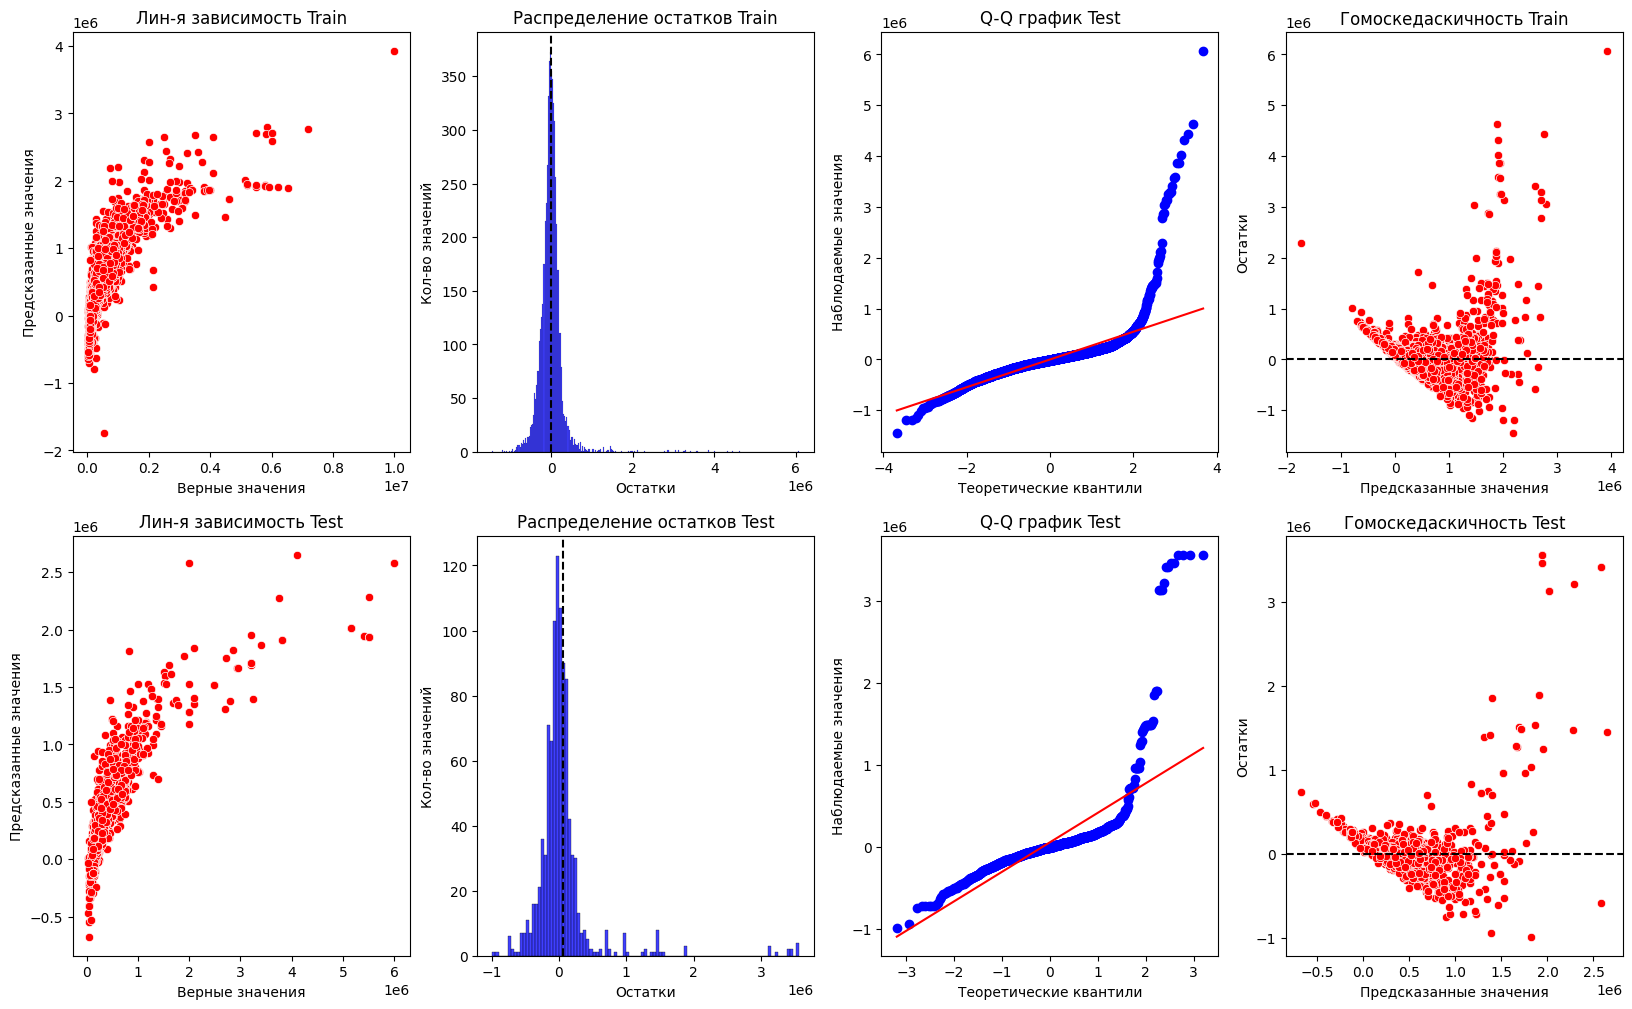

In [72]:
get_model_validation(y_pred_train, y_pred_test)

У нас в данных большое кол-во выбросов. А мы их пока не чистили. </br>
Хотелось бы, что остатки приняли примерно нормальное распределение. </br>

__Вывод:__
1. R-квадрат и скорректированный R-квадрат (степень соответствия) — 0.602 и 0.601 — объяснено 60%-ное объяснение дисперсии. Следовательно, модель объясняет большую часть изменчивости цены автомобиля.
2. F-stats и Prob(F-stats) (общее соответствие модели) - 1101.0 и 0 - Модель значима и объясняет 60% дисперсию не случайно. </br>
Критерий Фишера - сравнения объясненной дисперсии (вариации, объясненной моделью) с необъясненной дисперсией (остаточной дисперсией).
3. P-значения для всех коэффициентов, кроме `mileage` и `engine`  имеют p-value меньше 0.05 - это означает, что все признаки статистически значимы.


(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

__Lasso L1__ </br>
https://www.kaggle.com/code/gauravduttakiit/car-price-prediction-using-lasso-regression

- Нужна для того что бы получить стабильные оценки коэффициентов </br>
и упростить интерпретацию модели в условиях мультиколлинеарности.
</br>
- Минимизация функции потерь с учетом суммы абсолютных значений весов. </br>
Сумма абсолютных значений весов используется в качетсве штрафа за большие значения весов модели. </br>
- **Используется для отбора признаков (т.к. зануляет веса) и сокращения размерности.** </br>
- Чем больше значение альфа, тем более разреженная модель с наиболее важными предикаторами.

__Что мы имеем с предыдущего анализа линейной регрессии?__

Коэффициенты имеют высокий разброс - нестабильная оценка весов.
1. Признак корреляции признаков друг с другом.
2. Наличие выбросов или ошибок в данных.
3. Может вытекать из п.2 - наличие шумов. Т.е. модель подгоняется под шум.
4. Масштаб вроде в норме, данные отскалированны. </br>
</br>
Следовательно работаем дальше так: </br>
- Применяем методы связанные с анализом важности признаков (см. выше), </br>
- Диагностика мультиколлинеарности (см. выше),</br>
- Применяем кросс-валидацию для подбора гиперпараметров следующих моделей лин.рег. с регуляризациями.


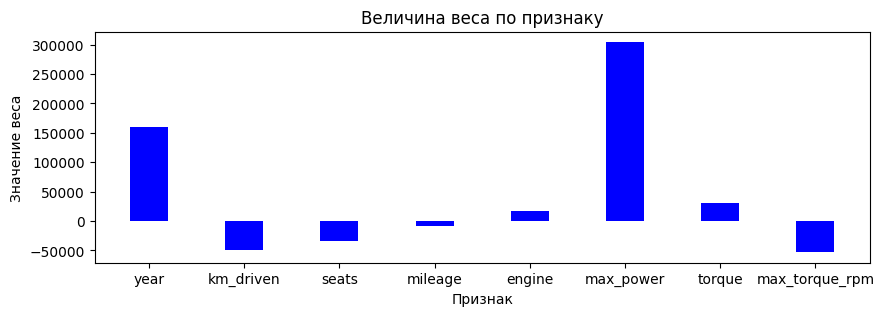

Вес w_0 для всей модели: 522960.0910958867
Вес w_1 на признаке year: 159647.4975
Вес w_2 на признаке km_driven: -49370.6392
Вес w_3 на признаке seats: -33870.5233
Вес w_4 на признаке mileage: -8096.7189
Вес w_5 на признаке engine: 16637.8854
Вес w_6 на признаке max_power: 304389.6561
Вес w_7 на признаке torque: 30845.4238
Вес w_8 на признаке max_torque_rpm: -52892.8161


In [73]:
# from sklearn.linear_model import Lasso

# Применим alpha=1
linreg_scaler_lasso = Lasso(alpha=1)
linreg_scaler_lasso.fit(X_train_scaler, y_train)

get_barplot_weight(X_train_scaler, linreg_scaler_lasso)

In [74]:
# Обучим модель и выведем метрики
y_pred_train, y_pred_test, metrics = evaluate_model_regression(
    linreg_scaler_lasso, X_train_scaler, y_train, X_test_scaler, y_test
)

RMSE на Train 337897.0440: 
R квадрат на Train 0.6017:
----------------------------------------
RMSE на Test 480644.8252: 
R квадрат на Test 0.5981:


In [75]:
# Сохраним метрики в словарь
metrics_dict["lasso_scaler_default"] = metrics

<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [76]:
print(
    "Lasso не занулиляет веса при низкиз значениях альфа, т.к. в данных много выбросов. Для зануления необходимы (очень~25000.0) высокие значения коэффициента."
)

Lasso не занулиляет веса при низкиз значениях альфа, т.к. в данных много выбросов. Для зануления необходимы (очень~25000.0) высокие значения коэффициента.


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [77]:
# from sklearn.model_selection import GridSearchCV

lasso_param_grid = {"alpha": np.logspace(1, 5, num=50)}

In [78]:
%%time
# Перебор aplpha
lasso_grid = GridSearchCV(
    linreg_scaler_lasso, param_grid=lasso_param_grid, cv=10, verbose=1
).fit(X_train_scaler, y_train)

linreg_scaler_lasso_best_alpha = lasso_grid.best_estimator_

Fitting 10 folds for each of 50 candidates, totalling 500 fits
CPU times: user 4.4 s, sys: 3.31 s, total: 7.7 s
Wall time: 4.04 s


In [79]:
# Обучим модель и выведем метрики
y_pred_train, y_pred_test, metrics = evaluate_model_regression(
    linreg_scaler_lasso_best_alpha, X_train_scaler, y_train, X_test_scaler, y_test
)

RMSE на Train 338527.3018: 
R квадрат на Train 0.6002:
----------------------------------------
RMSE на Test 486486.1077: 
R квадрат на Test 0.5883:


In [80]:
# Сохраним метрики в словарь
metrics_dict["lasso_scaler_best_alpha"] = metrics

<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

Перебрали 50 значений `alpha`, при каждом `alpha` обучили 10 моделей (10 фолдов). Следовательно всего 50 * 10 = 500 обучений.

In [81]:
# your code here
print(f"Лучшее значение alpha: {linreg_scaler_lasso_best_alpha.alpha}")

Лучшее значение alpha: 7196.856730011514


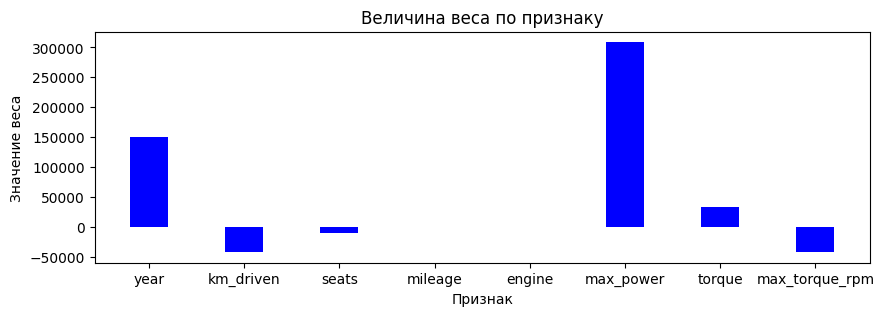

Вес w_0 для всей модели: 522960.09109588695
Вес w_1 на признаке year: 150130.8020
Вес w_2 на признаке km_driven: -42313.4128
Вес w_3 на признаке seats: -10772.6912
Вес w_4 на признаке mileage: -0.0000
Вес w_5 на признаке engine: 0.0000
Вес w_6 на признаке max_power: 308744.2251
Вес w_7 на признаке torque: 32790.8681
Вес w_8 на признаке max_torque_rpm: -41459.0250


In [82]:
get_barplot_weight(X_train_scaler, linreg_scaler_lasso_best_alpha)

Занулился вес `mileage` и `engine`

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [83]:
# from sklearn.linear_model import ElasticNet


# создание ElasticNet-модели
elastic = ElasticNet()

In [84]:
elastic_params = {
    "alpha": np.logspace(0, 1.2, num=50),
    "l1_ratio": np.arange(0.5, 1.0, 0.1),
}

In [85]:
%%time
elastic_grid = GridSearchCV(elastic, param_grid=elastic_params, cv=10, verbose=1).fit(
    X_train_scaler, y_train
)

linreg_scaler_elstic_best = elastic_grid.best_estimator_

Fitting 10 folds for each of 250 candidates, totalling 2500 fits
CPU times: user 20.8 s, sys: 16.3 s, total: 37.1 s
Wall time: 22.2 s


In [86]:
linreg_scaler_elstic_best

ElasticNet(l1_ratio=0.8999999999999999)

In [87]:
# Обучим модель и выведем метрики
y_pred_train, y_pred_test, metrics = evaluate_model_regression(
    linreg_scaler_elstic_best, X_train_scaler, y_train, X_test_scaler, y_test
)

RMSE на Train 339962.1213: 
R квадрат на Train 0.5968:
----------------------------------------
RMSE на Test 494328.9008: 
R квадрат на Test 0.5749:


In [88]:
# Сохраним метрики в словарь
metrics_dict["elastic_scaler_best"] = metrics

<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [89]:
# your code here
print(f"Лучшая ElasticNet-модель: {linreg_scaler_elstic_best}")

Лучшая ElasticNet-модель: ElasticNet(l1_ratio=0.8999999999999999)


In [90]:
pd.DataFrame(metrics_dict).T.reset_index().rename(columns=rename_metrics_dict)

,model,rmse_train,r2_train,rmse_test,r2_test
0,lr_default,337897.043952,0.601678,480644.055278,0.598109
1,lr_scaler_default,337897.043952,0.601678,480644.055278,0.598109
2,lasso_scaler_default,337897.043971,0.601678,480644.825220,0.598107
3,lasso_scaler_best_alpha,338527.301775,0.600190,486486.107748,0.588279
4,elastic_scaler_best,339962.121337,0.596794,494328.900843,0.574897


Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.5 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [91]:
# your code here
X_train_cat = df_train.drop(columns=["name", "selling_price"])

In [92]:
# Изменил размерность X_train_cat т.к. torque не удален, а разбит на два признака
assert X_train_cat.shape == (5840, 12)

In [93]:
X_train_cat.describe(include="object")

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


In [94]:
# По аналогии поступим с df_test
X_test_cat = df_test.drop(columns=["name", "selling_price"])

assert X_test_cat.shape == (1000, 12)

(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [95]:
# Создадим копию для ohe
X_train_cat_ohe = X_train_cat.copy()
X_test_cat_ohe = X_test_cat.copy()

In [96]:
# Изменим тип данных столбца seats
X_train_cat_ohe["seats"] = X_train_cat_ohe["seats"].astype("O")
X_test_cat_ohe["seats"] = X_test_cat_ohe["seats"].astype("O")

In [97]:
# Переопределим категориальные переменные
categorical = [
    var for var in X_train_cat_ohe.columns if X_train_cat_ohe[var].dtype == "O"
]
categorical

['fuel', 'seller_type', 'transmission', 'owner', 'seats']

In [98]:
# from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop="first", sparse_output=False).set_output(transform="pandas")

# Получим df с кодированными категориальными переменными
transformed_train = ohe.fit_transform(X_train_cat_ohe[categorical])
transformed_test = ohe.transform(X_test_cat_ohe[categorical])

# Train объединение
X_train_cat_ohe = pd.concat([X_train_cat_ohe, transformed_train], axis=1)
X_train_cat_ohe.drop(categorical, axis=1, inplace=True)

# Test объединение
X_test_cat_ohe = pd.concat([X_test_cat_ohe, transformed_test], axis=1)
X_test_cat_ohe.drop(categorical, axis=1, inplace=True)

__Еще раз отстандартизируем полученные датасеты__

In [99]:
# Запомним столбцы
cols = X_train_cat_ohe.columns

# Определим стандартизатор
scaler = StandardScaler()

# Стандартизируем таблицы
X_train_cat_ohe_scaler = scaler.fit_transform(X_train_cat_ohe)
X_test_cat_ohe_scaler = scaler.transform(X_test_cat_ohe)

# Переименуем названия колонок
X_train_cat_ohe_scaler = pd.DataFrame(X_train_cat_ohe_scaler, columns=cols)
X_test_cat_ohe_scaler = pd.DataFrame(X_test_cat_ohe_scaler, columns=cols)

In [100]:
# -> df_train(6_999, 14) -> df_train(5_840, 14) -> X_train(5_840, 8) + y_train(5_840) -> X_train_scaler(5_840, 8) + y_train(5_840)
#                        |
#                        -> X_train_cat(5_840, 12) -> X_train_cat_ohe(5_840, 25) -> X_train_cat_ohe_scaler(5_840, 25)


# -> df_test(1_000, 14) -------------------------> X_test(1_000, 8) + y_test(1_000) ---> X_test_scaler(1_000, 8) + y_test(1_000)
#                       |
#                       --> X_test_cat(1_000, 12) --> X_test_cat_ohe(1_000, 25) --> X_test_cat_ohe_scaler(1_000, 25)

(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [101]:
# from sklearn.linear_model import Ridge
# from sklearn.model_selection import GridSearchCV

ridge = Ridge()

ridge_params = {"alpha": np.logspace(2, 2.4, num=50)}

In [102]:
%%time
ridge_grid = GridSearchCV(ridge, param_grid=ridge_params, cv=10, verbose=1).fit(
    X_train_cat_ohe_scaler, y_train
)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
CPU times: user 4.56 s, sys: 3.35 s, total: 7.9 s
Wall time: 4.13 s


In [103]:
linreg_scaler_ridge_best = ridge_grid.best_estimator_

# Обучим модель и выведем метрики
y_pred_train, y_pred_test, metrics = evaluate_model_regression(
    linreg_scaler_ridge_best,
    X_train_cat_ohe_scaler,
    y_train,
    X_test_cat_ohe_scaler,
    y_test,
)

RMSE на Train 306500.3641: 
R квадрат на Train 0.6723:
----------------------------------------
RMSE на Test 463725.3521: 
R квадрат на Test 0.6259:


In [104]:
linreg_scaler_ridge_best

Ridge(alpha=196.73315239630438)

In [105]:
# Сохраним метрики в словарь
metrics_dict["ridge_ohe_scaler_ohe_best_alpha"] = metrics

In [106]:
pd.DataFrame(metrics_dict).T.reset_index().rename(columns=rename_metrics_dict)

,model,rmse_train,r2_train,rmse_test,r2_test
0,lr_default,337897.043952,0.601678,480644.055278,0.598109
1,lr_scaler_default,337897.043952,0.601678,480644.055278,0.598109
2,lasso_scaler_default,337897.043971,0.601678,480644.825220,0.598107
3,lasso_scaler_best_alpha,338527.301775,0.600190,486486.107748,0.588279
4,elastic_scaler_best,339962.121337,0.596794,494328.900843,0.574897
5,ridge_ohe_scaler_ohe_best_alpha,306500.364128,0.672261,463725.352124,0.625904


Используя кодированные категориальные переменные удалось значительно увеличить качество модели Ridge.

# Часть 4 - бонусная (1.5 балла) | Feature Engineering

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

Оценивать качество моделей будем метрикой R2

In [107]:
# your code here
# from sklearn.model_selection import cross_val_score

# В этом словаре будем смотерть прирост R2 при добавлении различных улучшений
model_metrics = dict()
rename_model_metrics = {"index": "model", 0: "r2"}

# Алгоритм, от которого будем отталкиваться
# Далее проверять качество моделей будем на кросс-валидации c 3 фолдами
model_metrics["lr_default"] = [
    cross_val_score(
        LinearRegression(), X_train_cat_ohe_scaler, y_train, cv=3, scoring="r2"
    ).mean()
]

pd.DataFrame(model_metrics).T.reset_index().rename(columns=rename_model_metrics)

,model,r2
0,lr_default,0.634349


__Обработка признаков__

In [108]:
# Переопределим количественные переменные
numerical = [
    var
    for var in X_train_cat_ohe_scaler.columns
    if X_train_cat_ohe_scaler[var].dtype != "O"
]

In [109]:
cols_for_transform = [
    "year",
    "km_driven",
    "mileage",
    "engine",
    "max_power",
    "torque",
    "max_torque_rpm",
]

__Ограничим максимальные значения и заменим выбросы значением в соответствии с выбранным квантилем__

In [110]:
def get_plots_outliers(dataset, cols):
    """
    Для отображения аномальных значений используем диапазон квантилей (0.996) и (0.75 + 1,5xIQR)
    """
    for column in dataset[cols]:
        # Визуализация
        fig, ax = plt.subplots(figsize=(12, 3))
        fig = sns.histplot(data=dataset, x=column, bins=50, kde=True)

        ax.set_ylabel("Количество")

        # Граница по 0.966 и 0.004 квантилю
        upper_first = dataset[column].quantile(0.996)
        lower_first = dataset[column].quantile(0.004)

        upper_outliers_size_first = dataset[column][dataset[column] > upper_first].size
        percent_first = upper_outliers_size_first / dataset[column].size

        lower_fence_outliers_size_first = dataset[column][
            dataset[column] < lower_first
        ].size
        percent_first_lower = lower_fence_outliers_size_first / dataset[column].size

        ax.axvline(upper_first, color="r", linestyle=":")
        ax.text(
            upper_first,
            0.99,
            "0.996 квантиль",
            color="r",
            ha="right",
            va="top",
            rotation=90,
            transform=ax.get_xaxis_transform(),
        )

        ax.axvline(lower_first, color="r", linestyle=":")
        ax.text(
            lower_first,
            0.99,
            "0.004 квантиль",
            color="r",
            ha="right",
            va="top",
            rotation=90,
            transform=ax.get_xaxis_transform(),
        )

        # Граница по 0.75 + 1,5xIQR
        upper_q = dataset[column].quantile(0.75)
        lower_q = dataset[column].quantile(0.25)
        iqr = upper_q - lower_q
        cut_off = iqr * 1.5
        upper_second = upper_q + cut_off

        upper_outliers_size_second = dataset[column][
            dataset[column] > upper_second
        ].size
        percent_second = upper_outliers_size_second / dataset[column].size

        ax.axvline(upper_second, color="g", linestyle=":")
        ax.text(
            upper_second,
            0.99,
            "0.75 квантиль + 1,5xIQR",
            color="g",
            ha="right",
            va="top",
            rotation=90,
            transform=ax.get_xaxis_transform(),
        )

        plt.show()
        print(
            f"{column}: \n\
0.996 квантиль: значение {upper_first:.1f}, кол-во выбросов: {upper_outliers_size_first}, доля: {percent_first:.4f}"
        )
        print(
            f"0.004 квантиль: значение {lower_first:.1f}, кол-во выбросов: {lower_fence_outliers_size_first}, доля: {percent_first_lower:.4f}"
        )
        print(
            f"0.75 квантиль + 1,5xIQR: значение {upper_second:.1f}, кол-во выбросов: {upper_outliers_size_second}, доля: {percent_second:.4f}"
        )
        print()

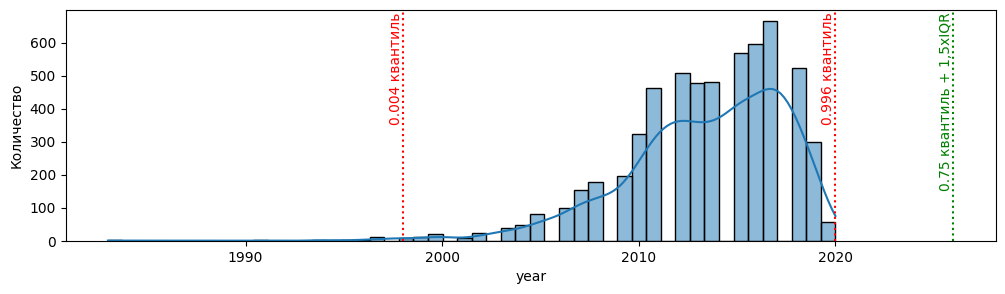

year: 
0.996 квантиль: значение 2020.0, кол-во выбросов: 0, доля: 0.0000
0.004 квантиль: значение 1998.0, кол-во выбросов: 19, доля: 0.0033
0.75 квантиль + 1,5xIQR: значение 2026.0, кол-во выбросов: 0, доля: 0.0000



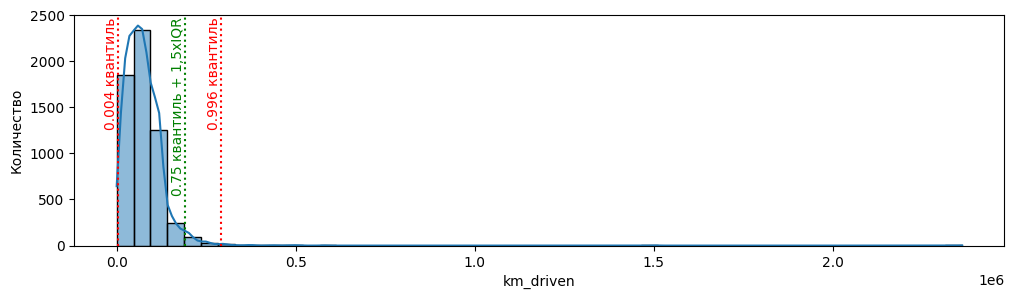

km_driven: 
0.996 квантиль: значение 291273.2, кол-во выбросов: 24, доля: 0.0041
0.004 квантиль: значение 2449.2, кол-во выбросов: 24, доля: 0.0041
0.75 квантиль + 1,5xIQR: значение 191500.0, кол-во выбросов: 142, доля: 0.0243



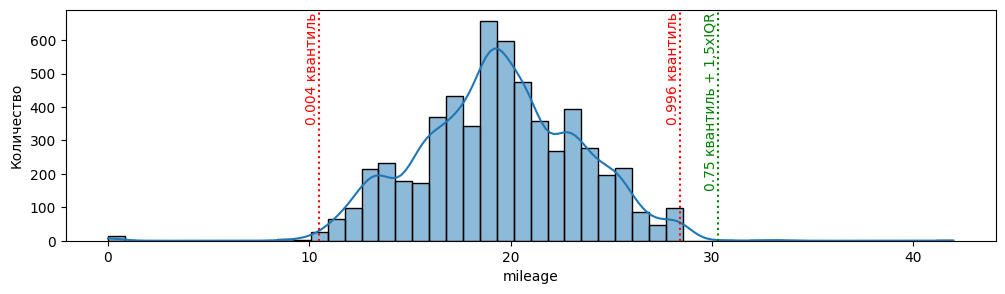

mileage: 
0.996 квантиль: значение 28.4, кол-во выбросов: 7, доля: 0.0012
0.004 квантиль: значение 10.5, кол-во выбросов: 23, доля: 0.0039
0.75 квантиль + 1,5xIQR: значение 30.3, кол-во выбросов: 7, доля: 0.0012



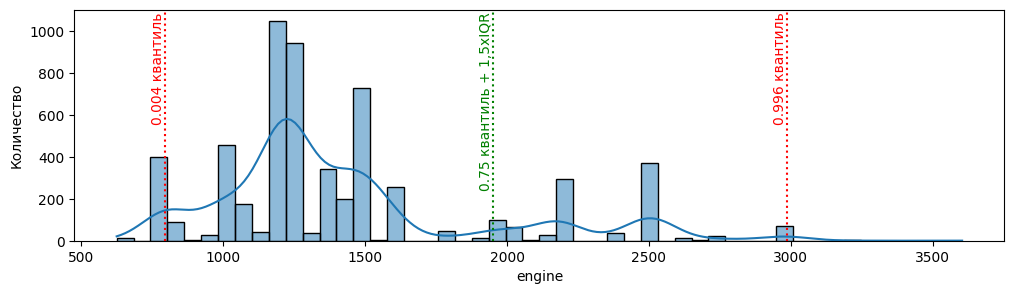

engine: 
0.996 квантиль: значение 2987.0, кол-во выбросов: 20, доля: 0.0034
0.004 квантиль: значение 796.0, кол-во выбросов: 20, доля: 0.0034
0.75 квантиль + 1,5xIQR: значение 1949.5, кол-во выбросов: 1002, доля: 0.1716



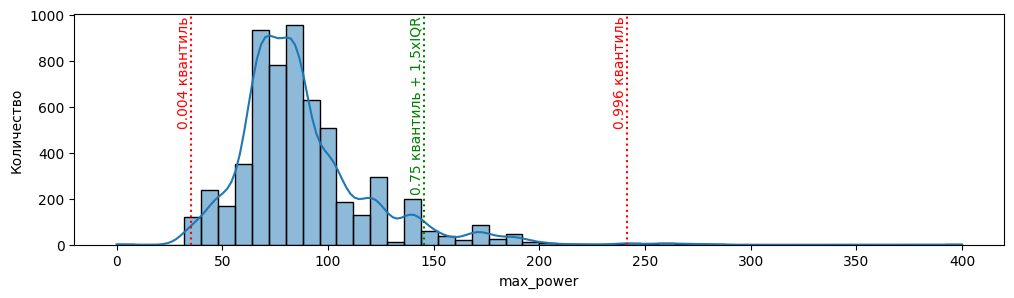

max_power: 
0.996 квантиль: значение 241.4, кол-во выбросов: 18, доля: 0.0031
0.004 квантиль: значение 35.0, кол-во выбросов: 22, доля: 0.0038
0.75 квантиль + 1,5xIQR: значение 145.5, кол-во выбросов: 325, доля: 0.0557



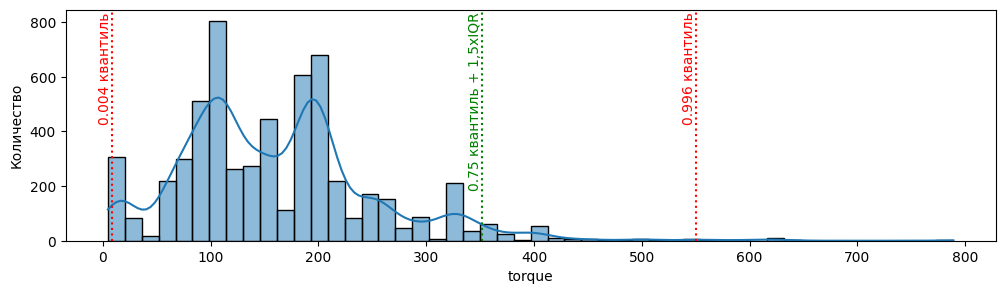

torque: 
0.996 квантиль: значение 550.0, кол-во выбросов: 20, доля: 0.0034
0.004 квантиль: значение 8.5, кол-во выбросов: 20, доля: 0.0034
0.75 квантиль + 1,5xIQR: значение 351.4, кол-во выбросов: 178, доля: 0.0305



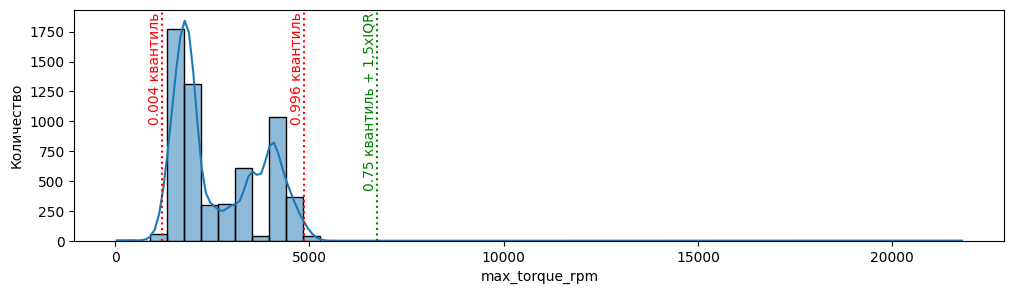

max_torque_rpm: 
0.996 квантиль: значение 4850.0, кол-во выбросов: 21, доля: 0.0036
0.004 квантиль: значение 1200.0, кол-во выбросов: 14, доля: 0.0024
0.75 квантиль + 1,5xIQR: значение 6750.0, кол-во выбросов: 1, доля: 0.0002



In [111]:
# Визуализируем выбросы
get_plots_outliers(df_train, cols_for_transform)

In [112]:
# Найдем выбросы свыше 0.996 и ниже 0.04 квантилей по X_train
dict_upperbound_num = {}
dict_lowerbound_num = {}

for col in cols_for_transform:
    upper_fence = X_train_cat_ohe_scaler[col].quantile(0.996)
    lower_fence = X_train_cat_ohe_scaler[col].quantile(0.004)

    dict_upperbound_num[col] = upper_fence
    dict_lowerbound_num[col] = lower_fence

In [113]:
# Функции замены выбросов значением соответствующем квантилю
def max_value(df1, col, top):
    return np.where(df1[col] > top, top, df1[col])


def min_value(df1, col, bottom):
    return np.where(df1[col] < bottom, bottom, df1[col])

In [114]:
# Произведем замену в X_train_cat_ohe_scaler аномальных значений
for df1 in [
    X_train_cat_ohe_scaler[cols_for_transform].copy(),
    X_test_cat_ohe_scaler[cols_for_transform].copy(),
]:
    for col in dict_upperbound_num:
        df1[col] = max_value(df1, col, dict_upperbound_num[col])
    for col in dict_lowerbound_num:
        df1[col] = min_value(df1, col, dict_lowerbound_num[col])

In [115]:
# Оценим числовые переменные
X_train_cat_ohe_scaler.agg(["mean", "median", "min", "max"])

,year,km_driven,mileage,engine,max_power,torque,max_torque_rpm,fuel_Diesel,fuel_LPG,fuel_Petrol,...,owner_Test Drive Car,owner_Third Owner,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9,seats_10,seats_14
mean,2.328214e-14,-5.900911e-17,-3.771717e-17,-1.338351e-16,-9.976799e-17,-1.630355e-16,1.277517e-16,1.216683e-17,-2.615868e-17,4.623395e-17,...,7.300097e-18,-2.676702e-17,1.216683e-18,-1.210599e-16,1.581688e-17,-3.406712e-17,0.000000,-1.368768e-17,-3.650048e-18,1.216683e-18
median,1.395696e-01,-6.579834e-02,-1.526502e-02,-3.736430e-01,-1.911128e-01,-1.228615e-01,-5.886934e-01,9.155393e-01,-7.652458e-02,-8.893041e-01,...,-2.618016e-02,-2.903319e-01,-1.279031e-01,5.144091e-01,-9.103457e-02,-3.984095e-01,-0.183878,-1.085404e-01,-5.560325e-02,-1.308672e-02
min,-7.430137e+00,-1.231167e+00,-4.875222e+00,-1.658595e+00,-2.778531e+00,-1.718359e+00,-2.343346e+00,-1.092252e+00,-7.652458e-02,-8.893041e-01,...,-2.618016e-02,-2.903319e-01,-1.279031e-01,-1.943978e+00,-9.103457e-02,-3.984095e-01,-0.183878,-1.085404e-01,-5.560325e-02,-1.308672e-02
max,1.604674e+00,3.806654e+01,5.662630e+00,4.477875e+00,9.864609e+00,6.898646e+00,1.712513e+01,9.155393e-01,1.306770e+01,1.124475e+00,...,3.819686e+01,3.444334e+00,7.818418e+00,5.144091e-01,1.098484e+01,2.509980e+00,5.438374,9.213162e+00,1.798456e+01,7.641335e+01


__Логарифмируем ассиметричные распределения__

In [116]:
# Функция для замены нулевых значений в столбцах значением 1.0e-10
def zero_change(data, variable):
    for col in variable:
        data[col] = np.where(data[col] > 1.0e-10, data[col], 1.0e-10)

In [117]:
# Функция для определения косинесс для каждого столбца при помощи skew()
def log1p_cols(data, variable):
    # Получим столбцы с косинесс значением выше 0.75
    # skewed_features = data[variable].skew()[data[variable].skew() > 0.75].index.values
    skewed_features = data[variable].skew().index.values

    # Перечислим столбцы из условия для логарифмирования
    # print("Признаки для логарифмирования (косинесс > 0.75):")
    print("Признаки для логарифмирования:")
    display(skewed_features)

    # Заменим нулевые значения в столбцах значением 1.0e-10
    zero_change(data, variable)

    # Применим log1p преобразование
    data[skewed_features] = np.log1p(data[skewed_features])

In [118]:
# Логарифмируем столбцы для Train
log1p_cols(X_train_cat_ohe_scaler, cols_for_transform)

Признаки для логарифмирования:


array(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque',
       'max_torque_rpm'], dtype=object)

In [119]:
# Логарифмируем столбцы для Test
log1p_cols(X_test_cat_ohe_scaler, cols_for_transform)

Признаки для логарифмирования:


array(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque',
       'max_torque_rpm'], dtype=object)

In [120]:
model_metrics["lr_default_modifed_features"] = [
    cross_val_score(
        LinearRegression(), X_train_cat_ohe_scaler, y_train, cv=3, scoring="r2"
    ).mean()
]
pd.DataFrame(model_metrics).T.reset_index().rename(columns=rename_model_metrics)

,model,r2
0,lr_default,0.634349
1,lr_default_modifed_features,0.612483


__Логарифмируем таргет__

In [121]:
# from sklearn.compose import TransformedTargetRegressor

# Пайплайн логарифмирования таргета
log_target_pipeline = TransformedTargetRegressor(
    regressor=LinearRegression(), func=np.log, inverse_func=np.exp
)

In [122]:
model_metrics["lr_default_modifed_features_log_target"] = [
    cross_val_score(
        log_target_pipeline, X_train_cat_ohe_scaler, y_train, cv=3, scoring="r2"
    ).mean()
]
pd.DataFrame(model_metrics).T.reset_index().rename(columns=rename_model_metrics)

,model,r2
0,lr_default,0.634349
1,lr_default_modifed_features,0.612483
2,lr_default_modifed_features_log_target,0.687668


__Генерируем новые признаки Pipeline__

In [123]:
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline

poly = PolynomialFeatures()

# Пайплайн предобработка
poly_preprocessing = ColumnTransformer(
    [("poly", poly, cols_for_transform)],
    remainder="passthrough",
    verbose_feature_names_out=False,
).set_output(transform="pandas")

# Пайплайн модели
poly_pipeline = Pipeline(
    [("preprocessing", poly_preprocessing), ("estimator", LinearRegression())]
)

In [124]:
model_metrics["lr_default_modifed_features_poly"] = [
    cross_val_score(
        poly_pipeline, X_train_cat_ohe_scaler, y_train, cv=3, scoring="r2"
    ).mean()
]
pd.DataFrame(model_metrics).T.reset_index().rename(columns=rename_model_metrics)

,model,r2
0,lr_default,0.634349
1,lr_default_modifed_features,0.612483
2,lr_default_modifed_features_log_target,0.687668
3,lr_default_modifed_features_poly,0.743564


__Конечная модель__

In [125]:
# Пайплайн конечной модели
final_model = TransformedTargetRegressor(
    regressor=Pipeline([("preprocessing", poly_preprocessing), ("estimator", Ridge())]),
    func=np.log,
    inverse_func=np.exp,
)


ridge_params = {"regressor__estimator__alpha": np.logspace(2, 2.4, num=50)}

In [126]:
%%time
# оптимизация гиперпараметров
final_model_grid = GridSearchCV(
    final_model, param_grid=ridge_params, cv=10, scoring="r2"
).fit(X_train_cat_ohe_scaler, y_train)

CPU times: user 20.6 s, sys: 15 s, total: 35.5 s
Wall time: 20.5 s


In [127]:
final_model_best_grid = final_model_grid.best_estimator_

# Обучим модель и выведем метрики
y_pred_train, y_pred_test, metrics = evaluate_model_regression(
    final_model_best_grid,
    X_train_cat_ohe_scaler,
    y_train,
    X_test_cat_ohe_scaler,
    y_test,
)

RMSE на Train 252762.1369: 
R квадрат на Train 0.7771:
----------------------------------------
RMSE на Test 302995.8605: 
R квадрат на Test 0.8403:


In [128]:
print(f"Финальный результат на тесте R2: {metrics[-1]}")

Финальный результат на тесте R2: 0.8402889164341796


# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [129]:
def business_metrics(y_true, y_pred):
    diff = np.abs(y_true.to_numpy() - y_pred)
    business_metrics = np.mean((diff / y_true) <= 0.1)
    return business_metrics

In [130]:
business_metrics(y_test, y_pred_test)

0.213

# Часть 5 (2.5 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [131]:
# from fastapi import FastAPI
# from pydantic import BaseModel
# from typing import List

# app = FastAPI()


# class Item(BaseModel):
#     name: str
#     year: int
#     selling_price: int
#     km_driven: int
#     fuel: str
#     seller_type: str
#     transmission: str
#     owner: str
#     mileage: str
#     engine: str
#     max_power: str
#     torque: str
#     seats: float


# class Items(BaseModel):
#     objects: List[Item]


# @app.post("/predict_item")
# def predict_item(item: Item) -> float:
#     return ...


# @app.post("/predict_items")
# def predict_items(items: List[Item]) -> List[float]:
#     return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

__Наведем порядок__

In [132]:
class PreprocessingTransformer:
    def __init__(
        self, cols_to_change, cols_for_replace_outliers, cols_for_log1p, cols_for_poly
    ):
        self.cols_to_change = cols_to_change
        self.cols_for_replace_outliers = cols_for_replace_outliers
        self.cols_for_log1p = cols_for_log1p
        self.cols_for_poly = cols_for_poly

    def transform(self, X, y):
        X, y = self.base_preprocessing(X, y)
        X_train, X_test, y_train, y_test = self.train_test_split(X, y)
        X_train, X_test = self.feature_engineering_preprocessing(X_train, X_test)
        return X_train, X_test, y_train, y_test

    def base_preprocessing(self, X, y):
        X = self.remove_duplicates(X)
        X = self.preprocess_features(X, self.cols_to_change)
        y = self.preprocess_features(y, self.cols_to_change)

        X["max_torque_rpm"] = self.split_torque(X["torque"], output="max_torque_rpm")
        X["torque"] = self.split_torque(X["torque"], output="torque")
        y["max_torque_rpm"] = self.split_torque(y["torque"], output="max_torque_rpm")
        y["torque"] = self.split_torque(y["torque"], output="torque")

        X, y = self.preprocessing_passes(X, y)
        return X, y

    def train_test_split(self, X, y):
        X_train, X_test, y_train, y_test = self.train_test_split(X, y)
        return X_train, X_test, y_train, y_test

    def feature_engineering_preprocessing(self, X_train, X_test):
        X_train, X_test = self.replace_outliers(
            X_train, X_test, self.cols_for_replace_outliers
        )
        X_train, X_test = self.preprocessing_ohe(X_train, X_test)
        X_train = self.log1p(X_train, self.cols_for_log1p)
        X_test = self.log1p(X_test, self.cols_for_log1p)
        X_train, X_test = self.preprocessing_standard_scaler(X_train, X_test)
        X_train, X_test = self.add_polynomial_features(
            X_train, X_test, self.cols_for_poly
        )
        return X_train, X_test

    def remove_duplicates(self, dataset):
        """
        Функция для удаления дубликатов из датасета
        """
        coll_names_dupl = dataset.drop(["selling_price"], axis=1).columns
        return dataset.drop_duplicates(
            subset=coll_names_dupl, keep="first"
        ).reset_index(drop=True)

    def preprocess_features(self, dataset, cols):
        """
        Функция для преобразования признаков в числовой тип данных
        """
        for col in cols:
            if dataset[col].dtype != "float64":
                dataset[col] = pd.to_numeric(
                    dataset[col].str.split(" ", expand=True)[0]
                )
        return dataset

    def split_torque(self, x, output: str = "torque") -> pd.Series:
        """
        Обработка признака `torque`
        """

        def split_torque(torque: Union[str, float]) -> Union[int, float]:
            if isinstance(torque, str):
                torque = torque.lower().replace(",", "").replace("/", "")
                torque = re.findall(r"[\d\.]+", torque)
                torque = [float(val) for val in torque]

                if "kgm" in torque:
                    torque[0] = np.round(torque[0] * 9.80665)

                if len(torque) < 2:
                    torque = (
                        [np.nan] + torque if "kgm" not in torque else torque + [np.nan]
                    )

                return torque[1] if output == "max_torque_rpm" else torque[0]
            else:
                return torque

        return x.apply(split_torque)

    def preprocessing_passes(self, train, test):
        """
        Замена пропусков в чиcловых признаках медианой
        Медиана определяется для столбцов по train
        """
        numerical = train.select_dtypes(include=np.number).columns

        median_values = train[numerical].median()

        train[numerical] = train[numerical].fillna(median_values)
        test[numerical] = test[numerical].fillna(median_values)

        return train, test

    def train_test_split(self, train, test):
        """
        Train-test разделение
        """
        train = train.sample(frac=1, random_state=42).reset_index(drop=True).copy()
        test = test.sample(frac=1, random_state=42).reset_index(drop=True).copy()

        y_train = train["selling_price"]
        X_train = train.drop(columns=["name", "selling_price"])

        y_test = test["selling_price"]
        X_test = test.drop(columns=["name", "selling_price"])
        return X_train, X_test, y_train, y_test

    def replace_outliers(self, train, test, cols):
        """
        Функция для замены выбросов на границы интервала, определенные квантилями
        """
        quantile_upper = 0.996
        quantile_lower = 0.004

        upper_bounds = train[cols].quantile(quantile_upper)
        lower_bounds = train[cols].quantile(quantile_lower)

        for col in cols:
            upper_bound = upper_bounds[col]
            lower_bound = lower_bounds[col]

            train[col] = np.clip(train[col], lower_bound, upper_bound)
            test[col] = np.clip(test[col], lower_bound, upper_bound)

        return train, test

    def preprocessing_ohe(self, train, test):
        """
        Преобразование всех категориальных переменных методом One Hot Encoding
        """
        train["seats"] = train["seats"].astype("O")
        test["seats"] = test["seats"].astype("O")

        categorical = [var for var in train.columns if train[var].dtype == "O"]

        ohe = OneHotEncoder(drop="first", sparse_output=False).set_output(
            transform="pandas"
        )

        transformed_train = ohe.fit_transform(train[categorical])
        transformed_test = ohe.transform(test[categorical])

        train = pd.concat([train, transformed_train], axis=1)
        train.drop(categorical, axis=1, inplace=True)

        test = pd.concat([test, transformed_test], axis=1)
        test.drop(categorical, axis=1, inplace=True)
        return train, test

    def log1p(self, dataset, cols):
        """
        Замена нулевых и отрицательных значений 1.0e-10, а затем вычисление натурального логарифма плюс 1.
        """
        dataset[cols] = np.log1p(np.maximum(dataset[cols], 1.0e-10))
        return dataset

    def preprocessing_standard_scaler(self, train, test):
        """
        Сандартизация всех стобцов данных
        """
        scaler = StandardScaler()

        train_scaled = scaler.fit_transform(train)
        test_scaled = scaler.transform(test)

        train_scaled_df = pd.DataFrame(train_scaled, columns=train.columns)
        test_scaled_df = pd.DataFrame(test_scaled, columns=test.columns)

        return train_scaled_df, test_scaled_df

    def add_polynomial_features(self, train, test, cols):
        """
        Генерация полиномиальных признаков
        """
        poly = PolynomialFeatures()

        train_poly = poly.fit_transform(train[cols])
        test_poly = poly.transform(test[cols])

        columns = poly.get_feature_names_out(input_features=cols)

        train_poly_df = pd.DataFrame(train_poly, columns=columns, index=train.index)
        test_poly_df = pd.DataFrame(test_poly, columns=columns, index=test.index)

        train = pd.concat([train, train_poly_df], axis=1)
        test = pd.concat([test, test_poly_df], axis=1)

        return train, test

In [133]:
transform_data = PreprocessingTransformer(
    cols_to_change=["mileage", "engine", "max_power"],
    cols_for_replace_outliers=[
        "year",
        "km_driven",
        "mileage",
        "engine",
        "max_power",
        "torque",
        "max_torque_rpm",
    ],
    cols_for_log1p=[
        "year",
        "km_driven",
        "mileage",
        "engine",
        "max_power",
        "torque",
        "max_torque_rpm",
    ],
    cols_for_poly=[
        "year",
        "km_driven",
        "mileage",
        "engine",
        "max_power",
        "torque",
        "max_torque_rpm",
    ],
)

X_train, X_test, y_train, y_test = transform_data.transform(df_train_save, df_test_save)

In [134]:
model = TransformedTargetRegressor(
    regressor=Pipeline([("estimator", Ridge())]), func=np.log, inverse_func=np.exp
)

In [135]:
ridge_params = {"regressor__estimator__alpha": np.linspace(0.5, 1, num=100)}

model_grid = GridSearchCV(model, param_grid=ridge_params, cv=10, scoring="r2").fit(
    X_train, y_train
)
model_best_grid = model_grid.best_estimator_

In [136]:
y_pred_test = model_best_grid.predict(X_test)
r2_test = r2_score(y_test, y_pred_test)

print("R квадрат на Test {0:0.4f}:".format(r2_test))

R квадрат на Test 0.8857:


In [137]:
# сохранение модели в формате pickle
with open(f"model.pkl", "wb") as file:
    pickle.dump(model_best_grid, file)

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link